# Final Project Submission

Please fill out:
* Student name:  James M. Irving
* Student pace:  full time
* Scheduled project review date/time:  03/08/19 at 12pm
* Instructor name: Jeff Herman
* Blog post URL: _Brandon has instructed us to focus on the jupyter notebook and presetation now and to write up the blog post following our review_
___

# Outline of Data Processing and Analysis(using OSEMN model)

1. **OBTAIN:** 
    **Import data, inspect, check for datatypes to convert and null values**
    - Display header and info
    - Drop any unneeded columns (df.drop(['col1','col2'],axis=1)

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [x] Check for #'s that are store as objects (df.info())
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted
            - Decide how to deal weird/null values (df.unique(), df.isna().sum(), df.describe()-min/max, etc
        - [x]  Check for categorical variables stored as integers
    - [x] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [X] Check for multicollinearity
         - use seaborn to make correlation matrix plot [Evernote Link](https://www.evernote.com/l/AArNyaEwjA5JUL6I9PazHs_ts_hU-m7ja1I/) 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [x] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [x] Check scales, ranges (df.describe())
    - [x] Check histograms to get an idea of distributions (df.hist()) and dat transformations to perform
        - Can also do kernel density estimates
    - [x] Use scatterplots to check for linearity and possible categorical variables (df.plot(kind-'scatter')
        - categoricals will look like vertical lines
    - [x] Use pd.plotting.scatter_matrix to visualize possible relationships
    - [x] Check for linearity

   
4. **FIT AN INITIAL MODEL:** 
    - Various forms, detail later...
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
5. **Revise the fitted model**
    - Multicollinearity is big issue for lin regression and cannot fully remove it
    - Use the predictive ability of model to test it (like R2 and RMSE)
    - Check for missed non-linearity
6. **Holdout validation / Train/test split**
    - use sklearn train_test_split 
___

<h1>Table of Contents (Links)<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Final-Project-Submission" data-toc-modified-id="Final-Project-Submission-1">Final Project Submission</a></span></li><li><span><a href="#Outline-of-Data-Processing-and-Analysis(using-OSEMN-model)" data-toc-modified-id="Outline-of-Data-Processing-and-Analysis(using-OSEMN-model)-2">Outline of Data Processing and Analysis(using OSEMN model)</a></span></li><li><span><a href="#OBTAIN:" data-toc-modified-id="OBTAIN:-3">OBTAIN:</a></span><ul class="toc-item"><li><span><a href="#Define-functions-to-be-used" data-toc-modified-id="Define-functions-to-be-used-3.1">Define functions to be used</a></span><ul class="toc-item"><li><span><a href="#def-check_column(series,-nlargest):" data-toc-modified-id="def-check_column(series,-nlargest):-3.1.1">def check_column(series, nlargest):</a></span></li><li><span><a href="#def-log_z(col):" data-toc-modified-id="def-log_z(col):-3.1.2">def log_z(col):</a></span></li><li><span><a href="#def-rem_out_z(col_name):" data-toc-modified-id="def-rem_out_z(col_name):-3.1.3">def rem_out_z(col_name):</a></span></li><li><span><a href="#def-multiplot(df):" data-toc-modified-id="def-multiplot(df):-3.1.4">def multiplot(df):</a></span></li><li><span><a href="#def-plot_hist_scat(df,target,stats):" data-toc-modified-id="def-plot_hist_scat(df,target,stats):-3.1.5">def plot_hist_scat(df,target,stats):</a></span></li><li><span><a href="#def-plot_hist_scat_sns(df,target,stats):" data-toc-modified-id="def-plot_hist_scat_sns(df,target,stats):-3.1.6">def plot_hist_scat_sns(df,target,stats):</a></span></li><li><span><a href="#def-detect_outliers(df,n,features):-(using-IQRs)" data-toc-modified-id="def-detect_outliers(df,n,features):-(using-IQRs)-3.1.7">def detect_outliers(df,n,features): (using IQRs)</a></span></li></ul></li></ul></li><li><span><a href="#SCRUB:" data-toc-modified-id="SCRUB:-4">SCRUB:</a></span><ul class="toc-item"><li><span><a href="#Fill-in-null-values-and-recast-variables-for-EDA" data-toc-modified-id="Fill-in-null-values-and-recast-variables-for-EDA-4.1">Fill in null values and recast variables for EDA</a></span><ul class="toc-item"><li><span><a href="#zipcode" data-toc-modified-id="zipcode-4.1.1">zipcode</a></span></li><li><span><a href="#sqft_basement" data-toc-modified-id="sqft_basement-4.1.2">sqft_basement</a></span></li><li><span><a href="#View" data-toc-modified-id="View-4.1.3">View</a></span></li><li><span><a href="#Waterfront" data-toc-modified-id="Waterfront-4.1.4">Waterfront</a></span></li><li><span><a href="#yr_renovated----&gt;-is_reno" data-toc-modified-id="yr_renovated---->-is_reno-4.1.5">yr_renovated  --&gt; is_reno</a></span></li><li><span><a href="#SCRUBBING-THUS-FAR..." data-toc-modified-id="SCRUBBING-THUS-FAR...-4.1.6">SCRUBBING THUS FAR...</a></span></li></ul></li><li><span><a href="#Question-1:-Which-predictors-should-be-analyzed-as-continuous-data,-vs-binned/categorical-data?" data-toc-modified-id="Question-1:-Which-predictors-should-be-analyzed-as-continuous-data,-vs-binned/categorical-data?-4.2">Question 1: Which predictors should be analyzed as continuous data, vs binned/categorical data?</a></span><ul class="toc-item"><li><span><a href="#Answer-1:-How-to-treat-each-variable" data-toc-modified-id="Answer-1:-How-to-treat-each-variable-4.2.1">Answer 1: How to treat each variable</a></span></li><li><span><a href="#List-of-vartypes/names" data-toc-modified-id="List-of-vartypes/names-4.2.2">List of vartypes/names</a></span></li></ul></li><li><span><a href="#COARSE-BINNING-Numerical-Data" data-toc-modified-id="COARSE-BINNING-Numerical-Data-4.3">COARSE-BINNING Numerical Data</a></span><ul class="toc-item"><li><span><a href="#binning-yr_built" data-toc-modified-id="binning-yr_built-4.3.1">binning yr_built</a></span></li><li><span><a href="#binning-sqft_basement" data-toc-modified-id="binning-sqft_basement-4.3.2">binning sqft_basement</a></span></li><li><span><a href="#binning-sqft_above" data-toc-modified-id="binning-sqft_above-4.3.3">binning sqft_above</a></span></li></ul></li><li><span><a href="#CHECKING-FOR-MULTICOLLINEARITY" data-toc-modified-id="CHECKING-FOR-MULTICOLLINEARITY-4.4">CHECKING FOR MULTICOLLINEARITY</a></span><ul class="toc-item"><li><span><a href="#Question-2:Which-predictors-are-closely-related-and-should-be-dropped?" data-toc-modified-id="Question-2:Which-predictors-are-closely-related-and-should-be-dropped?-4.4.1">Question 2:Which predictors are closely related and should be dropped?</a></span></li><li><span><a href="#Answer-2:" data-toc-modified-id="Answer-2:-4.4.2">Answer 2:</a></span></li></ul></li></ul></li><li><span><a href="#EXPLORE:" data-toc-modified-id="EXPLORE:-5">EXPLORE:</a></span><ul class="toc-item"><li><span><a href="#EDA-before-normalization/transformation" data-toc-modified-id="EDA-before-normalization/transformation-5.1">EDA before normalization/transformation</a></span><ul class="toc-item"><li><span><a href="#Examine-basic-descriptive-stats" data-toc-modified-id="Examine-basic-descriptive-stats-5.1.1">Examine basic descriptive stats</a></span></li><li><span><a href="#Visualizing-numerical-data" data-toc-modified-id="Visualizing-numerical-data-5.1.2">Visualizing numerical data</a></span></li><li><span><a href="#Visualizing-categorical-data" data-toc-modified-id="Visualizing-categorical-data-5.1.3">Visualizing categorical data</a></span></li><li><span><a href="#Question/Answer-3A:-Which-categorical-variables-show-the-greatest-potential-as-predictors?" data-toc-modified-id="Question/Answer-3A:-Which-categorical-variables-show-the-greatest-potential-as-predictors?-5.1.4">Question/Answer 3A: Which categorical variables show the greatest potential as predictors?</a></span></li></ul></li></ul></li><li><span><a href="#[SCRUB-2]-NORMALIZING-&amp;-TRANSFORMING" data-toc-modified-id="[SCRUB-2]-NORMALIZING-&amp;-TRANSFORMING-6">[SCRUB-2] NORMALIZING &amp; TRANSFORMING</a></span><ul class="toc-item"><li><span><a href="#Outlier-Removal---visualizing" data-toc-modified-id="Outlier-Removal---visualizing-6.1">Outlier Removal - visualizing</a></span><ul class="toc-item"><li><span><a href="#Question/Answer-3B:-Does-removal-of-outliers-improve-the-distrubtions?" data-toc-modified-id="Question/Answer-3B:-Does-removal-of-outliers-improve-the-distrubtions?-6.1.1">Question/Answer 3B: Does removal of outliers improve the distrubtions?</a></span></li></ul></li><li><span><a href="#REMOVING-OUTLIERS" data-toc-modified-id="REMOVING-OUTLIERS-6.2">REMOVING OUTLIERS</a></span><ul class="toc-item"><li><span><a href="#Filling-in-df_norm" data-toc-modified-id="Filling-in-df_norm-6.2.1">Filling in df_norm</a></span></li></ul></li><li><span><a href="#NORMALIZING-UNITS-(RobustScaler)" data-toc-modified-id="NORMALIZING-UNITS-(RobustScaler)-6.3">NORMALIZING UNITS (RobustScaler)</a></span></li></ul></li><li><span><a href="#CHECKING-NORMALIZED-DATASET" data-toc-modified-id="CHECKING-NORMALIZED-DATASET-7">CHECKING NORMALIZED DATASET</a></span><ul class="toc-item"><li><span><a href="#Recheck-multipol" data-toc-modified-id="Recheck-multipol-7.1">Recheck multipol</a></span></li><li><span><a href="#CAT.CODES-FOR-BINNED-DATA" data-toc-modified-id="CAT.CODES-FOR-BINNED-DATA-7.2">CAT.CODES FOR BINNED DATA</a></span></li><li><span><a href="#Concatenate-final-df-for-modeling-(df_run)" data-toc-modified-id="Concatenate-final-df-for-modeling-(df_run)-7.3">Concatenate final df for modeling (df_run)</a></span><ul class="toc-item"><li><span><a href="#Saving/loading-df_run-after-cleaning-up" data-toc-modified-id="Saving/loading-df_run-after-cleaning-up-7.3.1">Saving/loading df_run after cleaning up</a></span></li></ul></li></ul></li><li><span><a href="#FITTING-AN-INTIAL-MODEL:" data-toc-modified-id="FITTING-AN-INTIAL-MODEL:-8">FITTING AN INTIAL MODEL:</a></span><ul class="toc-item"><li><span><a href="#DETERMINING-IDEAL-FEATURES-TO-USE" data-toc-modified-id="DETERMINING-IDEAL-FEATURES-TO-USE-8.1">DETERMINING IDEAL FEATURES TO USE</a></span><ul class="toc-item"><li><span><a href="#Using-elbow-plots-to-identify-the-best-#-of-features-to-use" data-toc-modified-id="Using-elbow-plots-to-identify-the-best-#-of-features-to-use-8.1.1">Using elbow plots to identify the best # of features to use</a></span></li><li><span><a href="#Choosing-Features-Based-on-Rankings" data-toc-modified-id="Choosing-Features-Based-on-Rankings-8.1.2">Choosing Features Based on Rankings</a></span></li></ul></li><li><span><a href="#PRELIMINARY-UNIVARIATE-LINEAR-REGRESSION-MODELING" data-toc-modified-id="PRELIMINARY-UNIVARIATE-LINEAR-REGRESSION-MODELING-8.2">PRELIMINARY UNIVARIATE LINEAR REGRESSION MODELING</a></span></li><li><span><a href="#MULTIVARIATE-REGRESSIONS" data-toc-modified-id="MULTIVARIATE-REGRESSIONS-8.3">MULTIVARIATE REGRESSIONS</a></span><ul class="toc-item"><li><span><a href="#Final-Model-for-Validation:" data-toc-modified-id="Final-Model-for-Validation:-8.3.1">Final Model for Validation:</a></span></li><li><span><a href="#Save-df_run_ols-to-csv" data-toc-modified-id="Save-df_run_ols-to-csv-8.3.2">Save df_run_ols to csv</a></span></li></ul></li></ul></li><li><span><a href="#NEW-REGRESSION-RESULTS" data-toc-modified-id="NEW-REGRESSION-RESULTS-9">NEW REGRESSION RESULTS</a></span><ul class="toc-item"><li><span><a href="#K-Fold-valiation-with-OLS" data-toc-modified-id="K-Fold-valiation-with-OLS-9.1">K-Fold valiation with OLS</a></span></li><li><span><a href="#Q-Q-Plots" data-toc-modified-id="Q-Q-Plots-9.2">Q-Q Plots</a></span></li></ul></li><li><span><a href="#FINAL-MODEL---New" data-toc-modified-id="FINAL-MODEL---New-10">FINAL MODEL - New</a></span><ul class="toc-item"><li><span><a href="#Predictor-Coefficients-&amp;-Their-Affect-On-Sales-Price" data-toc-modified-id="Predictor-Coefficients-&amp;-Their-Affect-On-Sales-Price-10.1">Predictor Coefficients &amp; Their Affect On Sales Price</a></span></li><li><span><a href="#Future-Directions" data-toc-modified-id="Future-Directions-10.2">Future Directions</a></span></li></ul></li><li><span><a href="#SUMMARY-FIGURES-FOR-PRESENTATION" data-toc-modified-id="SUMMARY-FIGURES-FOR-PRESENTATION-11">SUMMARY FIGURES FOR PRESENTATION</a></span></li><li><span><a href="#END-OF-PROJECT-1-RE-SUBMISSION" data-toc-modified-id="END-OF-PROJECT-1-RE-SUBMISSION-12">END OF PROJECT 1 RE-SUBMISSION</a></span></li><li><span><a href="#ORIGINAL-REGRESSION-FROM-FIRST-PROJECT-REVIEW-SUBMISSION" data-toc-modified-id="ORIGINAL-REGRESSION-FROM-FIRST-PROJECT-REVIEW-SUBMISSION-13">ORIGINAL REGRESSION FROM FIRST PROJECT REVIEW SUBMISSION</a></span><ul class="toc-item"><li><span><a href="#Regression-Diagnostics" data-toc-modified-id="Regression-Diagnostics-13.1">Regression Diagnostics</a></span></li><li><span><a href="#Final-Model--(original)" data-toc-modified-id="Final-Model--(original)-13.2">Final Model  (original)</a></span></li><li><span><a href="#Predictor-Coefficients-&amp;-Their-Affect-On-Sales-Price" data-toc-modified-id="Predictor-Coefficients-&amp;-Their-Affect-On-Sales-Price-13.3">Predictor Coefficients &amp; Their Affect On Sales Price</a></span></li></ul></li></ul></div>

---

# OBTAIN:
 - Import required packages, read in dataframe, and definefunctions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use('seaborn')

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import normaltest as normtest # D'Agostino and Pearson's omnibus test

from collections import Counter
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('kc_house_data.csv')   
# Set index, create dataframe for dropped variables with id as index for both
df.set_index=('id')

drop_me =['id','lat','long','date']
df_dropped = df[drop_me].copy()
df_dropped.set_index(df['id'])
df.drop(drop_me,axis=1,inplace=True)

In [2]:
df.index

RangeIndex(start=0, stop=21597, step=1)

## Define functions to be used

### def check_column(series, nlargest):


In [3]:
# Check columns will 
def check_column(series,nlargest='all'):
    print(f"Column: df['{series.name}']':")
    print(f"dtype: {series.dtype}")
    print(f"isna: {series.isna().sum()} out of {len(series)} - {round(series.isna().sum()/len(series)*100,3)}%")
        
    print(f'\nUnique non-na values:') #,df['waterfront'].unique())
    if nlargest =='all':
        print(series.value_counts())
    else:
        print(series.value_counts().nlargest(nlargest))

### def log_z(col):
- Logs the column then z-scores

In [4]:
# define log + z-score
def log_z(col):
    
    col = np.array(col)
    logcol = np.log(col)
    
    zlogcol = (logcol-np.mean(logcol))/np.sqrt(np.var(logcol))
    
    return zlogcol

### def rem_out_z(col_name):
- Logs the column then z-scores and removes zscores>3

In [5]:
def rem_out_z(col_name):

    col = np.array(col_name)
    z_col = (col - np.mean(col)) / np.sqrt(np.var(col))
    z_col[abs(z_col)>3]=np.nan
    return z_col

### def multiplot(df):
- plots heat map of correlation values of input dataframe

In [6]:
# MULTIPLOT
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def multiplot(df):

    sns.set(style="white")

    # Compute the correlation matrix
    corr = df.corr()

    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(16, 16))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, center=0,
                
    square=True, linewidths=.5, cbar_kws={"shrink": .5}) #

### def plot_hist_scat(df,target,stats):

In [7]:
# Plots histogram and scatter (vs price) side by side
def plot_hist_scat(df,target='price',stats=False):
#     plt.style.use('bmh')
#     plt.style.use('fivethirtyeight')
    plt.style.use('fivethirtyeight')
#     fontTitle = {'family': 'serif',
#             'color':  'black',
#             'weight': 'normal',
#             'size': 16,
#             }
#     fontTicks = {'family': 'sans-serif',
#             'color':  'black',
#             'weight': 'normal',
#             'size': 10,
#             }
    results = [['column','K_square','p-val']]


    for column in df.describe():

        fig = plt.figure(figsize=(8,3) )#plt.figaspect(0.5))#(5,4))
        ax1 = fig.add_subplot(121)
        
        ax1.hist(df[column],density=True,label = column+' histogram',bins=20)
        ax1.set_title(column.capitalize())

        ax1.legend()
        
        ax2 = fig.add_subplot(122)
        ax2.scatter(x=df[column], y=df[target],label = column+' vs price',marker='.')
        ax2.set_title(column.capitalize())
        ax2.legend()

        fig.tight_layout()
        if stats==True:
            stat, p = normtest(df[column])
#             print(f'Normality test for {column}:K_square = {stat}, p-value = {p}')

            results.append([column,stat, p])
    return pd.DataFrame(results)

### def plot_hist_scat_sns(df,target,stats):

In [8]:
#SEABORN
# Plots histogram and scatter (vs price) side by side
def plot_hist_scat_sns(df,target='price',stats=False):
    plt.style.use('dark_background')
    results = [['column','K_square','p-val']]

    for column in df.describe():
    # for column in df:

        fig = plt.figure(figsize=(8,3) )#plt.figaspect(0.5))#(5,4))
        ax1 = fig.add_subplot(121)
        sns.distplot(df[column],kde=True,label = column+' histogram',norm_hist=True,ax=ax1)

        ax1.set(title=column.capitalize())
#         ax1.legend()
    
        ax2 = fig.add_subplot(122)
        sns.stripplot(df[column],df[target],ax=ax2)
        ax2.set(title=column.capitalize())
#         ax2.legend()

        fig.tight_layout()
        if stats==True:
            stat, p = normtest(df[column])
            print(f'Normality test for {column}:K_square = {stat}, p-value = {p}')

            results.append([column,stat, p])
    return pd.DataFrame(results)

### def detect_outliers(df,n,features): (using IQRs)


In [9]:
# Tukey's method using IQR to eliminate 
def detect_outliers(df,n,features):
    outlier_indices = []
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        # select observations containing more than 2 outliers
        outlier_indices = Counter(outlier_indices)        
        multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
        return multiple_outliers 
# Outliers_to_drop = detect_outliers(data,2,["col1","col2"])
# df.loc[Outliers_to_drop] # Show the outliers rows
# Drop outliers
# data= data.drop(Outliers_to_drop, axis = 0).reset_index(drop=True)

# SCRUB:

#### Initial inspection of dataframe, datatypes, and null values

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,1800,7503


In [11]:
# Display DataFrame Infro
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(6), int64(10), object(1)
memory usage: 2.8+ MB


In [12]:
# Check for columns with null values (remember strings/objects are not counted here)
res = df.isna().sum()
print(res[res>0],'\nTotal:',len(df))
# Waterfront, view, yr_renovated have missing values

waterfront      2376
view              63
yr_renovated    3842
dtype: int64 
Total: 21597


## Fill in null values and recast variables for EDA
- From examining the df.info and df.isna().sum(), there is 1 numerical data column that is currently text/object data type. 
    - I will address these first since they would be excluded from preliminary visualizations.
- There are also null values to address in waterfront, view, and yr_renovated
- The Date column will be recast as datetime

### zipcode

In [13]:
# Recast zipcode as a category
df['zipcode'] = df['zipcode'].astype('category')

### sqft_basement

In [14]:
# RECASTING SQFT_BASEMENT
# Checking why sqft_basement might be an object:
# df['sqft_basement'].value_counts().nlargest(10)
check_column(df['sqft_basement'],10)

Column: df['sqft_basement']':
dtype: object
isna: 0 out of 21597 - 0.0%

Unique non-na values:
0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
Name: sqft_basement, dtype: int64


- **sqft_basement is current an object, needs to be converted to int**
    - Need to ~~replace~~ drop the 454 '?' values
    - There are a lot of 0's, for sqft_basement. Not sure if I should keep them in the dataset. I am for now.
    - _Note: I originally replaced the ?'s with 0's, but am re-running the dataset with them dropped altogether._


In [15]:
# Removing rows with ? for sqft_basement and converting to float
print(len(df))
df['sqft_basement'].replace(to_replace = '?',value=np.nan,inplace=True) #,inplace=True)
df.dropna(axis=0,subset=['sqft_basement'],inplace=True)
df['sqft_basement'] = df['sqft_basement'].astype('float')
df['sqft_basement'].isna().sum()
check_column(df['sqft_basement'],10)

21597
Column: df['sqft_basement']':
dtype: float64
isna: 0 out of 21143 - 0.0%

Unique non-na values:
0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
Name: sqft_basement, dtype: int64


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21143 entries, 0 to 21596
Data columns (total 17 columns):
price            21143 non-null float64
bedrooms         21143 non-null int64
bathrooms        21143 non-null float64
sqft_living      21143 non-null int64
sqft_lot         21143 non-null int64
floors           21143 non-null float64
waterfront       18804 non-null float64
view             21082 non-null float64
condition        21143 non-null int64
grade            21143 non-null int64
sqft_above       21143 non-null int64
sqft_basement    21143 non-null float64
yr_built         21143 non-null int64
yr_renovated     17389 non-null float64
zipcode          21143 non-null category
sqft_living15    21143 non-null int64
sqft_lot15       21143 non-null int64
dtypes: category(1), float64(7), int64(9)
memory usage: 2.8 MB


### View
- ~~Replace the 61 null values with appropriate value for data type~~
- Drop the 61 view null values

In [17]:
# Check for columns with null values (remember strings/objects are not counted here)
res = df.isna().sum()
print(res[res>0])
# Waterfront, view, yr_renovated have missing values

waterfront      2339
view              61
yr_renovated    3754
dtype: int64


In [18]:
check_column(df['view'])

Column: df['view']':
dtype: float64
isna: 61 out of 21143 - 0.289%

Unique non-na values:
0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64


In [19]:
# Drop null values from view and re-check column
print(len(df))
df.dropna(axis=0,subset=['view'],inplace=True)
print(len(df))
check_column(df['view'])

21143
21082
Column: df['view']':
dtype: float64
isna: 0 out of 21082 - 0.0%

Unique non-na values:
0.0    19018
2.0      930
3.0      496
1.0      327
4.0      311
Name: view, dtype: int64


In [20]:
# Convert view to category and create a coded version called code_view
df['view'] = df['view'].astype('category')
df['code_view'] = df.view.cat.codes
df['code_view'].value_counts()

0    19018
2      930
3      496
1      327
4      311
Name: code_view, dtype: int64

In [21]:
# Drop drop_me variable from main df, save in df_dropped
drop_me = 'view'
df_dropped[drop_me] = df[drop_me].copy()
df.drop(drop_me,axis=1,inplace=True)

In [22]:
#Recheck whole df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 17 columns):
price            21082 non-null float64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
waterfront       18749 non-null float64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null int64
yr_renovated     17340 non-null float64
zipcode          21082 non-null category
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
code_view        21082 non-null int8
dtypes: category(1), float64(6), int64(9), int8(1)
memory usage: 2.6 MB


### Waterfront
- Recast as ~~int~~ string
- Waterfront has 2339 null values to ~~replace.~~ make into **unordered and coded into "NaN"** category
    - Note this is string "NaN" not np.nan


In [23]:
check_column(df['waterfront'])

Column: df['waterfront']':
dtype: float64
isna: 2333 out of 21082 - 11.066%

Unique non-na values:
0.0    18608
1.0      141
Name: waterfront, dtype: int64


In [24]:
# Convert waterfront to category, replace null values with "NaN"' string to make it a category
df['waterfront'] = df['waterfront'].astype('category')
df['waterfront'].replace(np.nan,"NaN",inplace=True)
df['waterfront'] = df['waterfront'].astype('category')

In [25]:
# df['waterfront'].value_counts()
check_column(df['waterfront'],10)

Column: df['waterfront']':
dtype: category
isna: 0 out of 21082 - 0.0%

Unique non-na values:
0.0    18608
NaN     2333
1.0      141
Name: waterfront, dtype: int64


In [26]:
# Turn waterfront into coded column 
df['code_waterfront'] = df.waterfront.cat.codes
check_column(df['code_waterfront'])

Column: df['code_waterfront']':
dtype: int8
isna: 0 out of 21082 - 0.0%

Unique non-na values:
0    18608
2     2333
1      141
Name: code_waterfront, dtype: int64


In [27]:
# Drop drop_me variable from main df, save in df_dropped
drop_me = 'waterfront'
df_dropped[drop_me] = df[drop_me].copy()
df.drop(drop_me,axis=1,inplace=True)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 17 columns):
price              21082 non-null float64
bedrooms           21082 non-null int64
bathrooms          21082 non-null float64
sqft_living        21082 non-null int64
sqft_lot           21082 non-null int64
floors             21082 non-null float64
condition          21082 non-null int64
grade              21082 non-null int64
sqft_above         21082 non-null int64
sqft_basement      21082 non-null float64
yr_built           21082 non-null int64
yr_renovated       17340 non-null float64
zipcode            21082 non-null category
sqft_living15      21082 non-null int64
sqft_lot15         21082 non-null int64
code_view          21082 non-null int8
code_waterfront    21082 non-null int8
dtypes: category(1), float64(5), int64(9), int8(2)
memory usage: 2.5 MB


### yr_renovated  --> is_reno
- yr_renovated has 3754 null values
    - Presumably this is because the homes were never renovated
    - ~~Will replace with 0.0~~ 
    - Replace all 0.0's with NaN
- Replacing yr_renovated with binary category based on it if has been renovated or not
    - Make new column 'is_reno'

##### Make is_reno category (0 or 1)

In [29]:
check_column(df['yr_renovated'],10)

Column: df['yr_renovated']':
dtype: float64
isna: 3742 out of 21082 - 17.75%

Unique non-na values:
0.0       16618
2014.0       69
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2009.0       21
2004.0       21
Name: yr_renovated, dtype: int64


In [30]:
# Fill in 0.0 yr_renovated as np.nan temporarily
df['yr_renovated'].replace(0.0,np.nan,inplace=True)

# Recheck for null values
check_column(df['yr_renovated'],10) #df.isna().sum()

Column: df['yr_renovated']':
dtype: float64
isna: 20360 out of 21082 - 96.575%

Unique non-na values:
2014.0    69
2013.0    31
2003.0    31
2007.0    30
2000.0    29
2005.0    29
1990.0    22
2009.0    21
2004.0    21
2006.0    20
Name: yr_renovated, dtype: int64


In [31]:
# Get indices of all np.nan values to be used for is_reno category below
idx_nan = df['yr_renovated'].loc[df['yr_renovated'].isna()].index
idx_notnan = df['yr_renovated'].loc[~df['yr_renovated'].isna()].index

# Make df['is_reno']
df['is_reno'] = df['yr_renovated'].copy
df['is_reno'][idx_nan] = 0
df['is_reno'][idx_notnan] = 1

check_column(df['is_reno'],10) 

Column: df['is_reno']':
dtype: int64
isna: 0 out of 21082 - 0.0%

Unique non-na values:
0    20360
1      722
Name: is_reno, dtype: int64


C:\Users\james\Anaconda3\envs\learn-env_MD\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\james\Anaconda3\envs\learn-env_MD\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
# Drop drop_me variable from main df, save in df_dropped
drop_me = 'yr_renovated'
df_dropped[drop_me] = df[drop_me].copy()
df.drop(drop_me,axis=1,inplace=True)

### SCRUBBING THUS FAR...
- Removed null values by dropping na from sqft_basement and view. 
- Converted waterfront to category and made NaN its own separate category (since there were so many null vlaues) 
- Converted yr_renovated to is_reno simple 0 or 1 value
- Recase zipcodes as category since there is no numerical relationship between zipcode values


- Next to inspect distributions and scatterplots to identify which numerical columns may be better analyzed as categories


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 17 columns):
price              21082 non-null float64
bedrooms           21082 non-null int64
bathrooms          21082 non-null float64
sqft_living        21082 non-null int64
sqft_lot           21082 non-null int64
floors             21082 non-null float64
condition          21082 non-null int64
grade              21082 non-null int64
sqft_above         21082 non-null int64
sqft_basement      21082 non-null float64
yr_built           21082 non-null int64
zipcode            21082 non-null category
sqft_living15      21082 non-null int64
sqft_lot15         21082 non-null int64
code_view          21082 non-null int8
code_waterfront    21082 non-null int8
is_reno            21082 non-null int64
dtypes: category(1), float64(4), int64(10), int8(2)
memory usage: 3.1 MB


## Question 1: Which predictors should be analyzed as continuous data, vs binned/categorical data?

#### Identifying numerical data better analyzed as categorical
- Will examine histogram distributions and scatter plots vs price for each variable in df.describe()

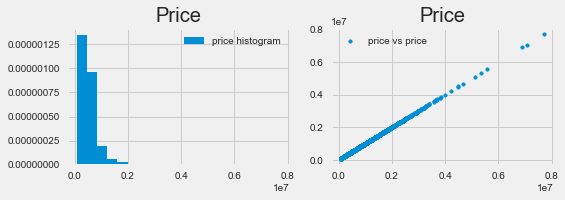

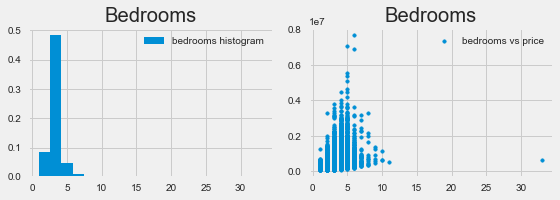

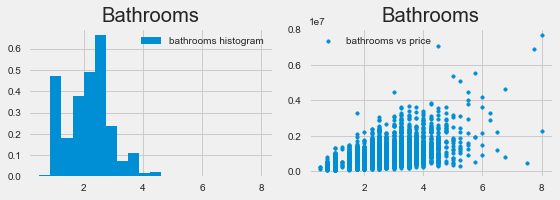

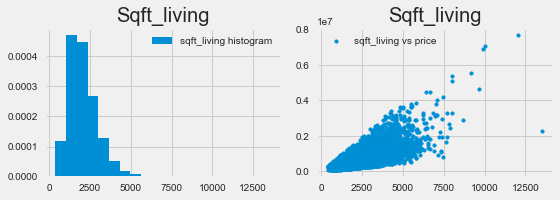

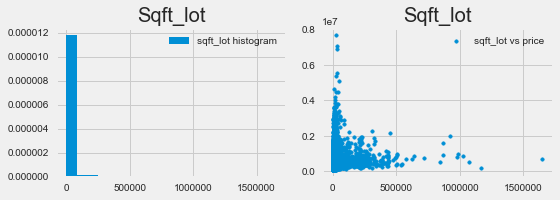

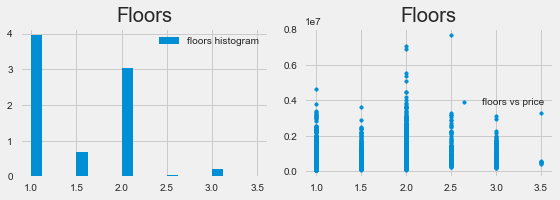

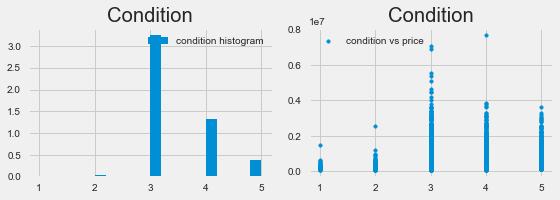

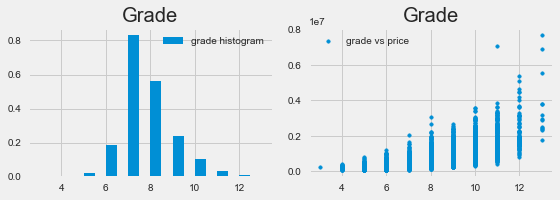

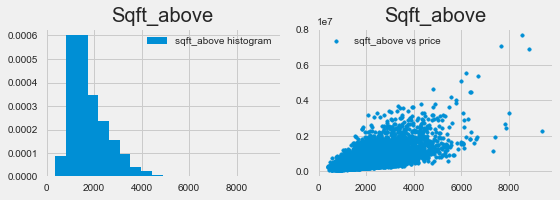

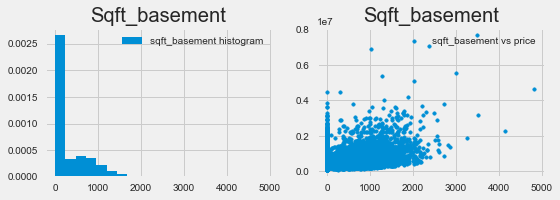

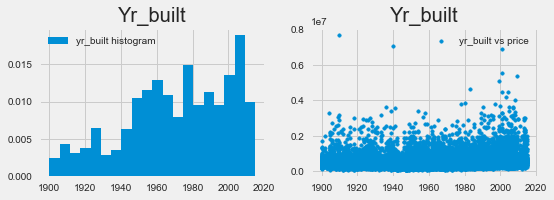

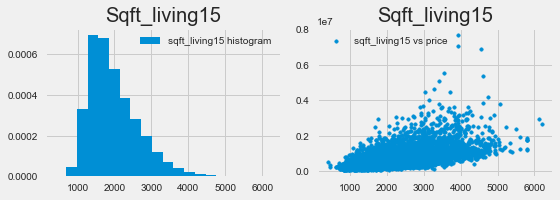

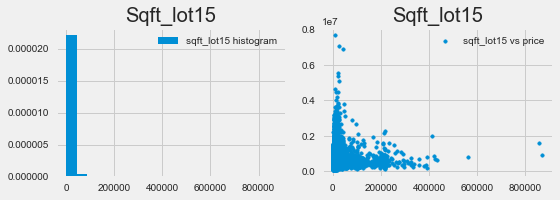

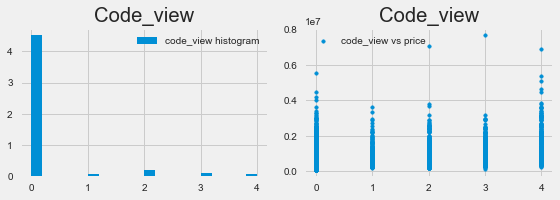

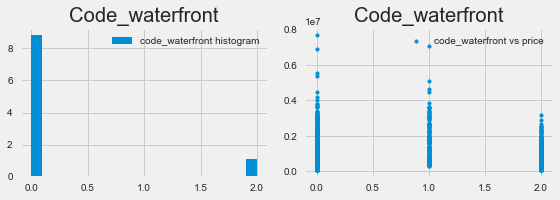

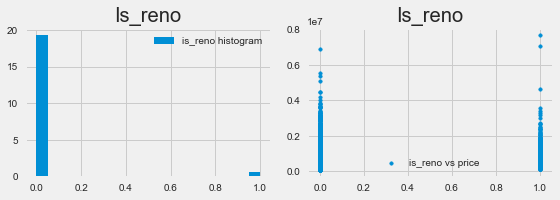

In [34]:
# Plot histograms and scatterplots vs target variable price for all numerical columns in df (show up in .describe())

fig = plot_hist_scat(df)
# fig = plot_hist_scat_sns(df)


### Answer 1: How to treat each variable
- Notes on histograms and scatterplots
#### First, to comment on scatter plots that are indicative of categorical data:
- **Columns to be analyzed as categorical data:** (cast as int for now, make sure its .~~astype('category').cat.as_ordered()~~ one-hot coded later before running regression
    - Waterfront
    - View
    - Zipcode
- **Columns that are ordinal data.** (e.g. 2 floors is indeed  double 1 floor)
    - Floors 
    - Bedrooms
    - Bathrooms
    - Condition
    - Grade
- **Columns that may be best analyzed by binning and casting as categorical data**
    - Yr_built
    - is_reno
        - classified as simply renovated or not.** 
    - sqft_basement
    - sqft_above
- **Numerical columns** (that may be best analyzed as such)
    - All sqft categories
    - price
    - Note: moved sqft_basement to binned category to deal with 0's, also added sqft_above to accompany it 
- **Numerical columns that were dropped**
    - id
    - Lat
    - Long
    - Date
    - yr_renovated -> is_reno
    
  
#### Second, to comment on distributions
- The target variable, price, seems a bit skewed and _may_ be better analyzed as log-transformed. 
    - Try both log-transformed and unaltered
- All sqft columns seem to be skewed and should be transformed. (log)

### List of vartypes/names

```python
# Create tuples with columns names of categorical variables for easy extraction 
cat_vars = ('waterfront','view','zipcode')
ord_vars = ('grade','condition','floors','bedrooms','bathrooms')
vars_to_bin = ('yr_built','yr_renovated','sqft_above','sqft_basement')
num_vars = ('sqft_living', 'sqft_lot','sqft_living15', 'sqft_lot15')
```

## COARSE-BINNING Numerical Data 
- yr_built, yr_renovated
- Added sqft_basement due to 0 values
- Added sqft_above to accompany basement

### binning yr_built

In [35]:
# Check the min and max of the yr variables for binning range
df['yr_built'].describe()

count    21082.000000
mean      1971.023337
std         29.323120
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [36]:
## Bin yr_built then make yr_built category
# yr_built min is 1900, max is 2015
bins = list(range(1900,2030,10))

df['yr_built'].replace(np.nan,0,inplace=True)
bins_yrbuilt = pd.cut(df['yr_built'], bins,include_lowest=True) # Cut into bins
# check_column(bins_yrbuilt)

df['bins_yrbuilt'] = bins_yrbuilt.astype('category').cat.as_ordered() #.cat.as_ordered()

# Inspecting the binned data counts
check_column(df['bins_yrbuilt'])

Column: df['bins_yrbuilt']':
dtype: category
isna: 0 out of 21082 - 0.0%

Unique non-na values:
(2000.0, 2010.0]      3354
(1960.0, 1970.0]      2484
(1950.0, 1960.0]      2411
(1970.0, 1980.0]      2351
(1980.0, 1990.0]      2297
(1990.0, 2000.0]      2085
(1940.0, 1950.0]      1806
(1920.0, 1930.0]      1142
(2010.0, 2020.0]      1066
(1899.999, 1910.0]     759
(1910.0, 1920.0]       747
(1930.0, 1940.0]       580
Name: bins_yrbuilt, dtype: int64


In [37]:
# Drop original 
drop_me = 'yr_built'
df_dropped[drop_me] = df[drop_me].copy()
df.drop(drop_me,axis=1,inplace=True)

### binning sqft_basement

In [38]:
df['sqft_basement'].describe()

count    21082.000000
mean       291.359975
std        442.007858
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64

In [39]:
check_column(df['sqft_basement'],10)

Column: df['sqft_basement']':
dtype: float64
isna: 0 out of 21082 - 0.0%

Unique non-na values:
0.0       12798
600.0       216
500.0       209
700.0       207
800.0       201
400.0       184
1000.0      147
900.0       142
300.0       140
200.0       105
Name: sqft_basement, dtype: int64


In [40]:
# Definine bins where bins 0-1 is its own interval
bins=[-np.inf]
[bins.append(x) for x in range(1,5500,500)]
# bins

# cut_basement = df['sqft_basement'].replace(0,np.nan)
cut_basement = df['sqft_basement'].replace(np.nan,0).copy()
# cut_basement = cut_basement.replace('NaN',0)

bins_sqftbase = pd.cut(cut_basement, bins=bins, include_lowest=True) # Cut into bins
df['bins_sqftbasement'] = bins_sqftbase.copy()

# Cast as ordered category
df['bins_sqftbasement'] = df['bins_sqftbasement'].astype('category').cat.as_ordered()

# Check result
check_column(df['bins_sqftbasement'])

Column: df['bins_sqftbasement']':
dtype: category
isna: 0 out of 21082 - 0.0%

Unique non-na values:
(-inf, 1.0]         12798
(501.0, 1001.0]      3849
(1.0, 501.0]         2617
(1001.0, 1501.0]     1476
(1501.0, 2001.0]      269
(2001.0, 2501.0]       57
(2501.0, 3001.0]       11
(3001.0, 3501.0]        3
(4501.0, 5001.0]        1
(4001.0, 4501.0]        1
(3501.0, 4001.0]        0
Name: bins_sqftbasement, dtype: int64


In [41]:
# Drop original 
drop_me = 'sqft_basement'
df_dropped[drop_me] = df[drop_me].copy()
df.drop(drop_me,axis=1,inplace=True)

### binning sqft_above

In [42]:
check_column(df['sqft_above'],10)
df['sqft_above'].describe()

Column: df['sqft_above']':
dtype: int64
isna: 0 out of 21082 - 0.0%

Unique non-na values:
1300    208
1010    206
1200    197
1220    190
1140    181
1180    174
1400    174
1340    173
1060    173
1250    168
Name: sqft_above, dtype: int64


count    21082.000000
mean      1789.000000
std        828.369355
min        370.000000
25%       1200.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

In [43]:
# sqft_above 
# Bins to cover range seen above in .describe
bins = list(range(0,9501,500))

# cut_above = df['sqft_above'].replace(0,np.nan)
bins_sqftabove = pd.cut(df['sqft_above'], bins=bins, include_lowest=True) # Cut into bins, including left edge 
check_column(bins_sqftabove)

Column: df['sqft_above']':
dtype: category
isna: 0 out of 21082 - 0.0%

Unique non-na values:
(1000.0, 1500.0]    7352
(1500.0, 2000.0]    4686
(2000.0, 2500.0]    2764
(500.0, 1000.0]     2488
(2500.0, 3000.0]    1815
(3000.0, 3500.0]    1088
(3500.0, 4000.0]     466
(4000.0, 4500.0]     239
(4500.0, 5000.0]      80
(5000.0, 5500.0]      42
(-0.001, 500.0]       19
(6000.0, 6500.0]      16
(5500.0, 6000.0]      14
(6500.0, 7000.0]       4
(7500.0, 8000.0]       3
(8500.0, 9000.0]       2
(7000.0, 7500.0]       2
(8000.0, 8500.0]       1
(9000.0, 9500.0]       1
Name: sqft_above, dtype: int64


In [44]:
bins_sqftabove.replace(np.nan,'NaN',inplace=True)
df['bins_sqftabove']=bins_sqftabove.astype('category').cat.as_ordered()

check_column(df['bins_sqftabove'])

Column: df['bins_sqftabove']':
dtype: category
isna: 0 out of 21082 - 0.0%

Unique non-na values:
(1000.0, 1500.0]    7352
(1500.0, 2000.0]    4686
(2000.0, 2500.0]    2764
(500.0, 1000.0]     2488
(2500.0, 3000.0]    1815
(3000.0, 3500.0]    1088
(3500.0, 4000.0]     466
(4000.0, 4500.0]     239
(4500.0, 5000.0]      80
(5000.0, 5500.0]      42
(-0.001, 500.0]       19
(6000.0, 6500.0]      16
(5500.0, 6000.0]      14
(6500.0, 7000.0]       4
(7500.0, 8000.0]       3
(8500.0, 9000.0]       2
(7000.0, 7500.0]       2
(8000.0, 8500.0]       1
(9000.0, 9500.0]       1
Name: bins_sqftabove, dtype: int64


In [45]:
# Drop original 
drop_me = 'sqft_above'
df_dropped[drop_me] = df[drop_me].copy()
df.drop(drop_me,axis=1,inplace=True)

##  CHECKING FOR MULTICOLLINEARITY
### Question 2:Which predictors are closely related and should be dropped?


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 17 columns):
price                21082 non-null float64
bedrooms             21082 non-null int64
bathrooms            21082 non-null float64
sqft_living          21082 non-null int64
sqft_lot             21082 non-null int64
floors               21082 non-null float64
condition            21082 non-null int64
grade                21082 non-null int64
zipcode              21082 non-null category
sqft_living15        21082 non-null int64
sqft_lot15           21082 non-null int64
code_view            21082 non-null int8
code_waterfront      21082 non-null int8
is_reno              21082 non-null int64
bins_yrbuilt         21082 non-null category
bins_sqftbasement    21082 non-null category
bins_sqftabove       21082 non-null category
dtypes: category(4), float64(3), int64(8), int8(2)
memory usage: 2.7 MB


In [47]:
# to_drop_copy = ['sqft_above','sqft_basement','yr_built','waterfront','view']
# df_dropped = df[to_drop_copy].copy()
# # df.drop(to_drop_copy,axis=1,inplace=True)

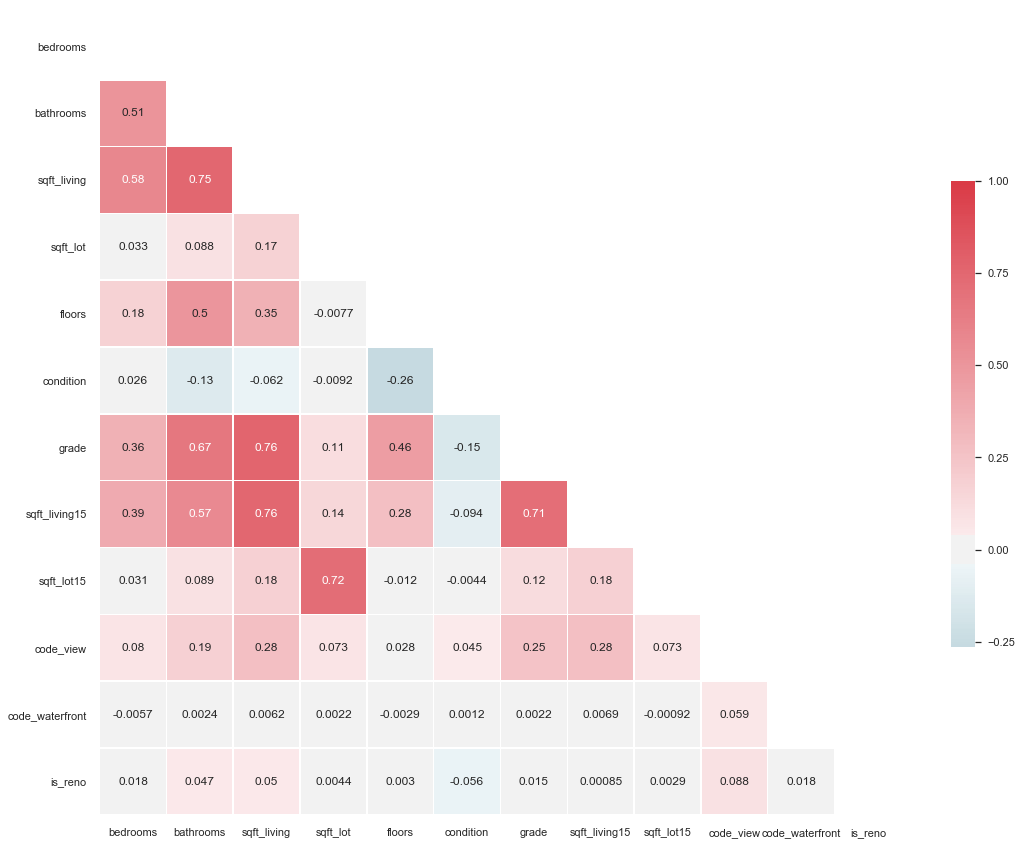

In [48]:
# Plot correlation  heatmaps for all data 
# pause
to_drop = ['price']
multiplot(df.drop(to_drop,axis=1))

In [49]:
# # Test which multicol variables to keep
# pause
# df[['price','sqft_living','sqft_living15','sqft_above','sqft_basement']].corr()

### Answer 2: 
- Sqft_living is highly correlated with sqft_living15 and grade,
- These correlations make sense sense since neighborhoods probably have similar construction.
    - The r values are ~0.75 (threshold) and have sufficient intuitive rationale to keep. 

In [50]:
# # Save copy of data in current form.
# df.to_csv('scrubbed_data.csv')
# df_dropped.to_csv('dropped_data.csv')

# EXPLORE:
- Re-examining the basic stats and distributions of the data.
- Decide on transformations to perform
    - Normalize afterwards.
- Visually examine for possible relationships 

## EDA before normalization/transformation

### Examine basic descriptive stats

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 17 columns):
price                21082 non-null float64
bedrooms             21082 non-null int64
bathrooms            21082 non-null float64
sqft_living          21082 non-null int64
sqft_lot             21082 non-null int64
floors               21082 non-null float64
condition            21082 non-null int64
grade                21082 non-null int64
zipcode              21082 non-null category
sqft_living15        21082 non-null int64
sqft_lot15           21082 non-null int64
code_view            21082 non-null int8
code_waterfront      21082 non-null int8
is_reno              21082 non-null int64
bins_yrbuilt         21082 non-null category
bins_sqftbasement    21082 non-null category
bins_sqftabove       21082 non-null category
dtypes: category(4), float64(3), int64(8), int8(2)
memory usage: 2.7 MB


In [52]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,sqft_living15,sqft_lot15,code_view,code_waterfront,is_reno,bins_yrbuilt,bins_sqftbasement,bins_sqftabove
0,221900.0,3,1.00,1180,5650,1.0,3,7,98178,1340,5650,0,2,0,"(1950.0, 1960.0]","(-inf, 1.0]","(1000.0, 1500.0]"
1,538000.0,3,2.25,2570,7242,2.0,3,7,98125,1690,7639,0,0,1,"(1950.0, 1960.0]","(1.0, 501.0]","(2000.0, 2500.0]"
2,180000.0,2,1.00,770,10000,1.0,3,6,98028,2720,8062,0,0,0,"(1930.0, 1940.0]","(-inf, 1.0]","(500.0, 1000.0]"
3,604000.0,4,3.00,1960,5000,1.0,5,7,98136,1360,5000,0,0,0,"(1960.0, 1970.0]","(501.0, 1001.0]","(1000.0, 1500.0]"
4,510000.0,3,2.00,1680,8080,1.0,3,8,98074,1800,7503,0,0,0,"(1980.0, 1990.0]","(-inf, 1.0]","(1500.0, 2000.0]"


In [53]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_living15,sqft_lot15,code_view,code_waterfront,is_reno
count,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,3.409828,7.657717,1986.917418,12732.514135,0.233327,0.228014,0.034247
std,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.650597,1.173690,685.544250,27148.781580,0.765066,0.630372,0.181868
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,1.000000,3.000000,399.000000,651.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,3.000000,7.000000,1490.000000,5100.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,3.000000,7.000000,1840.000000,7626.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,4.000000,8.000000,2360.000000,10088.750000,0.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,5.000000,13.000000,6210.000000,871200.000000,4.000000,2.000000,1.000000


#### Notes on basic statistics
- Bedrooms has some very clear outliers (max is 33, but 75% quartile is only 4)
    - May want to remove outliers after Z-scoring (Absolute Z-score > 3)
- Same with bathrooms (8 is max, 75% quartile is only 2.5)
- Same with sqft_living (max 13540, 75% quartile = 2550) 
- Also same with sqft_lot15, sqftliving15

### Visualizing numerical data
- Distributions and scatterplots
- Note: May want to cast all categoricals as strings/categories for visualization
    - Keeping as is for now

In [54]:
# Separate out numerical 
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_living15,sqft_lot15,code_view,code_waterfront,is_reno
count,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,3.409828,7.657717,1986.917418,12732.514135,0.233327,0.228014,0.034247
std,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.650597,1.173690,685.544250,27148.781580,0.765066,0.630372,0.181868
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,1.000000,3.000000,399.000000,651.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,3.000000,7.000000,1490.000000,5100.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,3.000000,7.000000,1840.000000,7626.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,4.000000,8.000000,2360.000000,10088.750000,0.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,5.000000,13.000000,6210.000000,871200.000000,4.000000,2.000000,1.000000


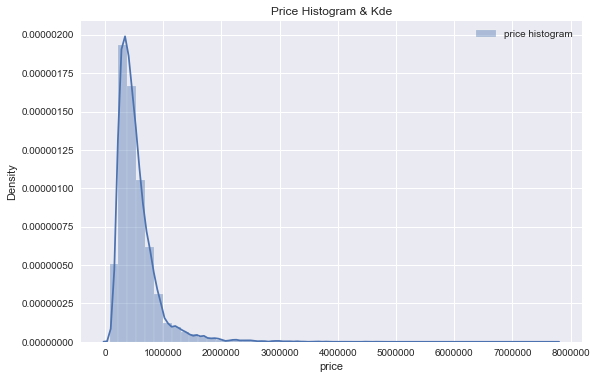

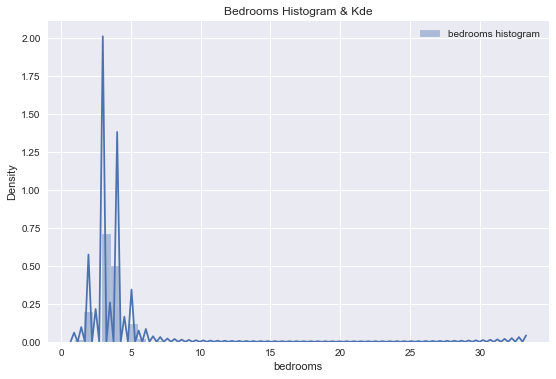

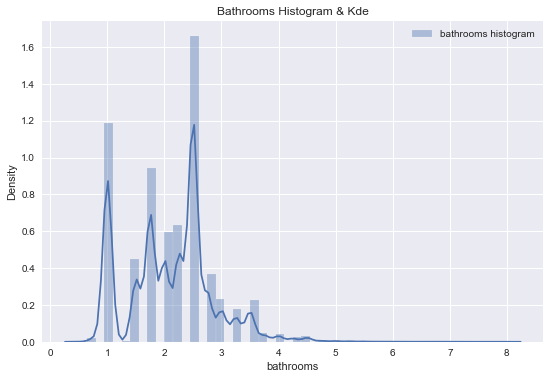

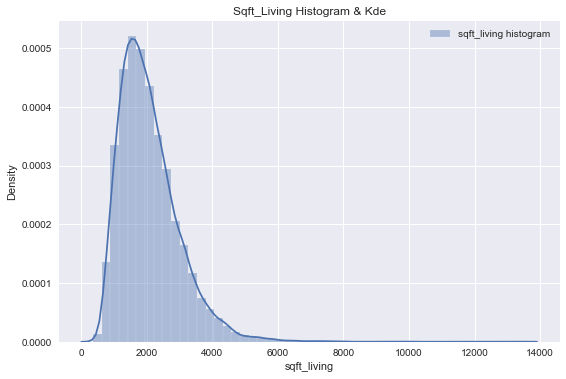

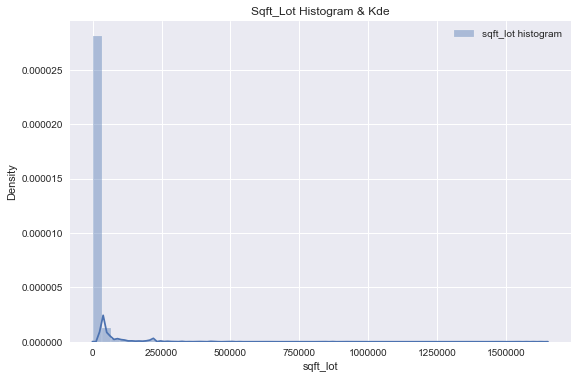

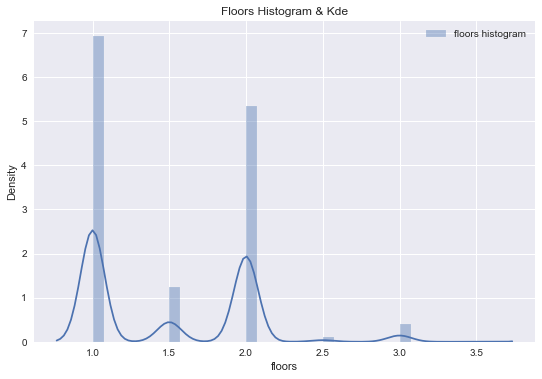

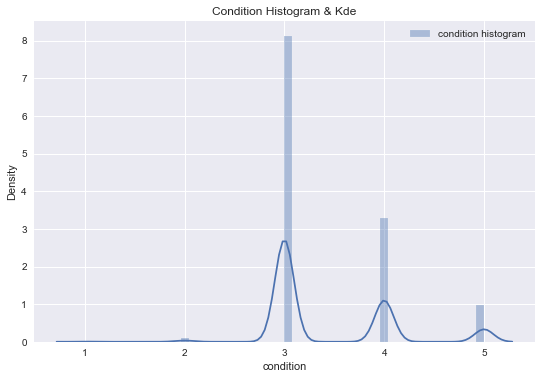

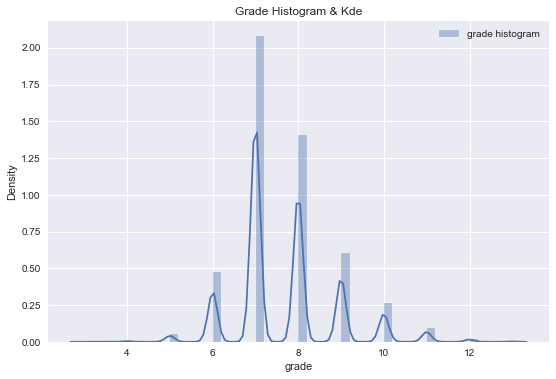

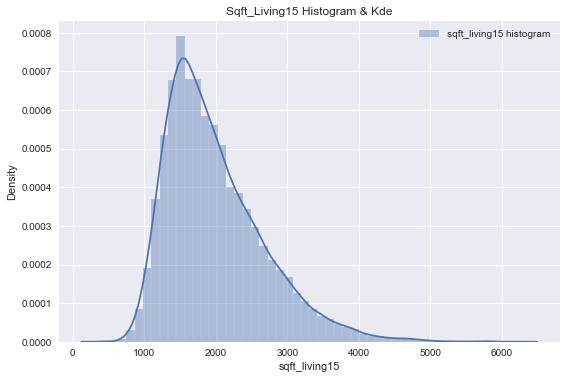

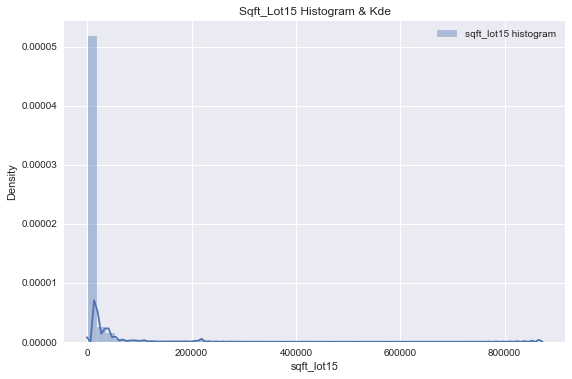

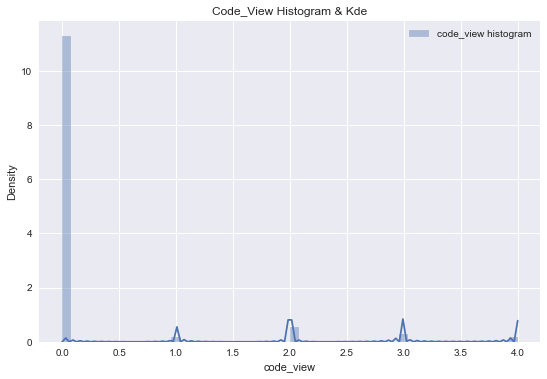

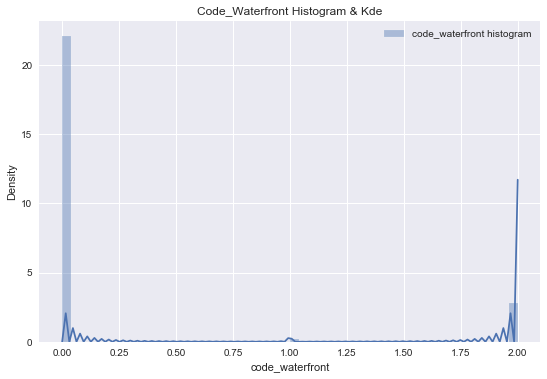

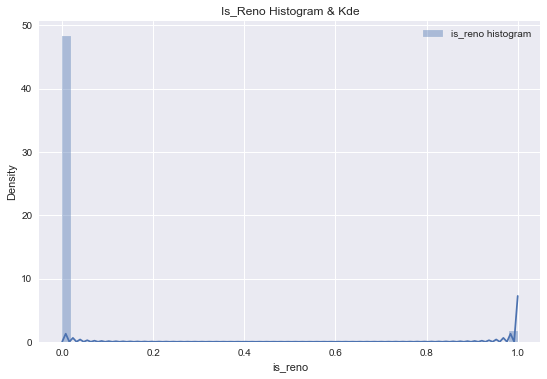

In [55]:
# INSPECTING NUMERICAL DATA DISTPLOTS + KDE
plt.style.use('seaborn')

for column in df.describe().columns:
    
    sns.distplot(df[column],kde=True,label = column+' histogram',norm_hist=True)
    title = column+' histogram & KDE'
    plt.title(title.title())
    plt.ylabel('Density')
    plt.legend()
    plt.show()

# Uncomment below if want new scatter_matrix
# fig = pd.plotting.scatter_matrix(df_clean,figsize=(12,12))

#### Notes on distplots 
- Essentialy all numerical data seems to be at least slightly skewed.
    - Do not think it is sufficient to log-transform the data and lose model interpretability

### Visualizing categorical data 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 17 columns):
price                21082 non-null float64
bedrooms             21082 non-null int64
bathrooms            21082 non-null float64
sqft_living          21082 non-null int64
sqft_lot             21082 non-null int64
floors               21082 non-null float64
condition            21082 non-null int64
grade                21082 non-null int64
zipcode              21082 non-null category
sqft_living15        21082 non-null int64
sqft_lot15           21082 non-null int64
code_view            21082 non-null int8
code_waterfront      21082 non-null int8
is_reno              21082 non-null int64
bins_yrbuilt         21082 non-null category
bins_sqftbasement    21082 non-null category
bins_sqftabove       21082 non-null category
dtypes: category(4), float64(3), int64(8), int8(2)
memory usage: 2.7 MB


In [57]:
# Define list of all categorical variables 
list_cat_vars = ['zipcode', 'bins_yrbuilt', 'bins_sqftbasement', 'bins_sqftabove','condition','grade','code_view','code_waterfront']

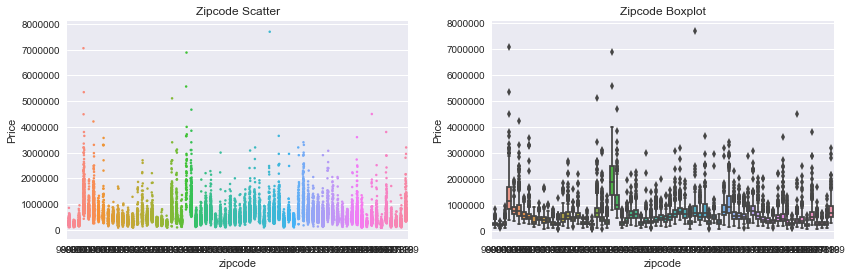

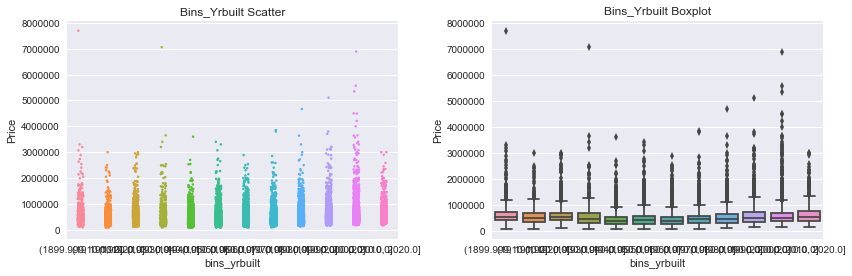

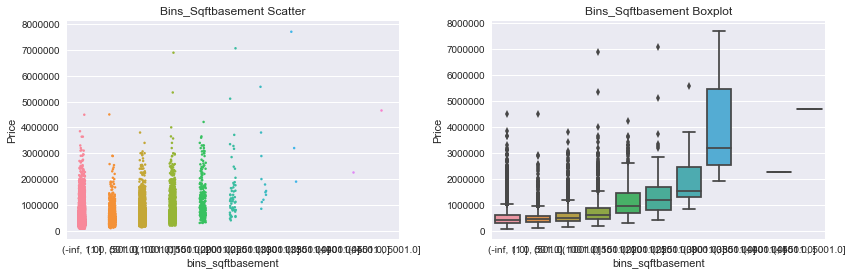

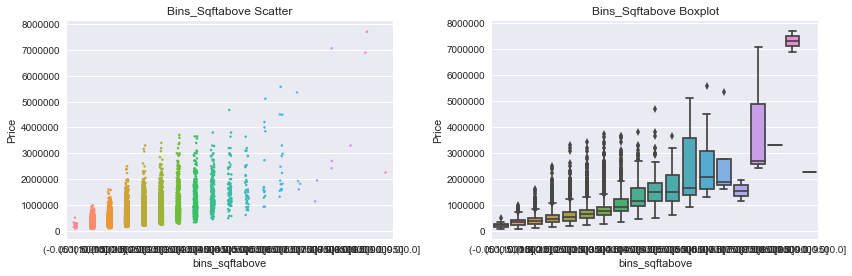

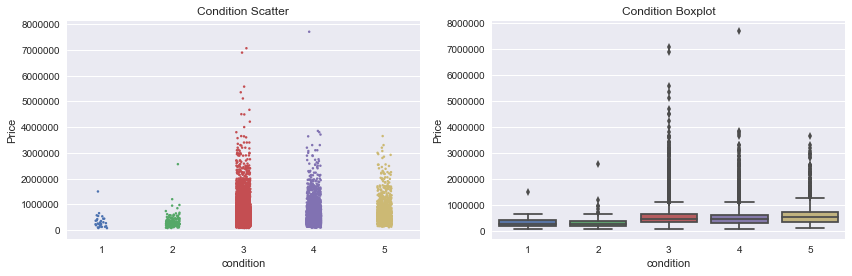

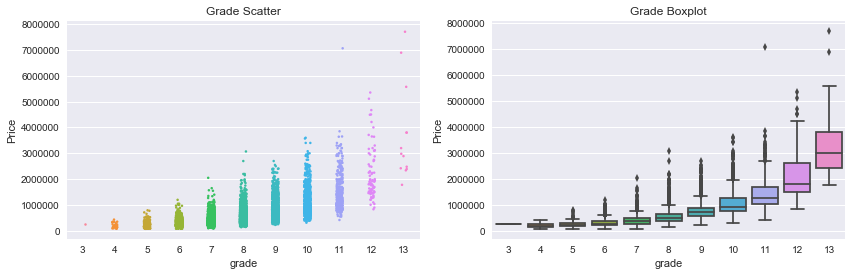

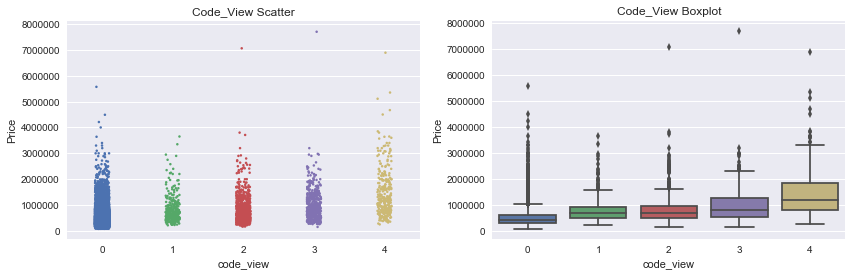

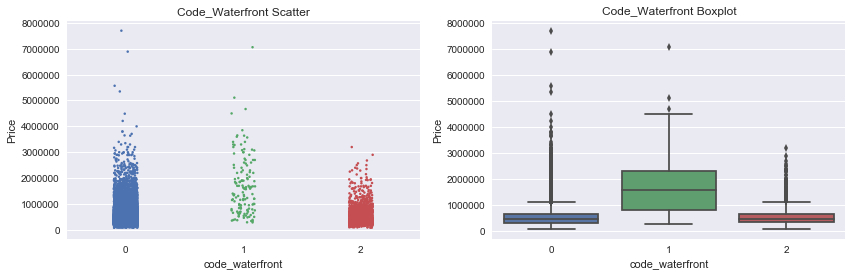

In [58]:
# Plotting scatterplots and boxplots for categorical data
plt.style.use('seaborn')
for column in list_cat_vars:
   
    fig = plt.figure(figsize=(12,4))

    ax1  = fig.add_subplot(121)
    ax1 = sns.stripplot(x=df[column],y=df['price'],marker='.') 
    # ax1.set_title('Price vs ',column,' scatter plot')
    title1=column+' scatter'
    ax1.set_title(title1.title())
    ax1.set_xlabel(column)
    ax1.set_ylabel('Price')

    
    ax2 = fig.add_subplot(122)
    ax2 = sns.boxplot(x=df[column],y=df['price']) 
    title2=column+' boxplot'
    ax2.set_title(title2.title())
    ax2.set_xlabel(column)
    ax2.set_ylabel('Price')
    fig.tight_layout()

### Question/Answer 3A: Which categorical variables show the greatest potential as predictors?

#### ANSWER 3A:
**Notes on categorical scatter plots**
- grade seems to be strongly related to price (notice how the whole range of values seems to increase in price at higher grades.
- Zipcodes look to differ quite a bit in terms of price.
- Condition looks to be highly related to price (at least above condition level 2)
- View does not look as strongly related to price as I expected.
- Floors do not seem as related as expected
- yr_built may have some relationship with price
- yr_renovated has somewhat of a trend, but recent renovations buck this trend

In [59]:
# # INSPECTING REGRESSION PLOTS
# plt.style.use('seaborn')

# plot_vars=df.describe().columns

# for column in plot_vars:
# #     df_plot=df[column]
# #     df_plot = df.loc[df[column]>0]
#     plot= sns.regplot(df[column], df['price'],robust=False,marker='.') #kde=True,label = column+' histogram')
# #     plot = sns.boxplot(df[column],df['price'])
#     title = column+' linear regression'
#     plt.title(title.title())
# #     plt.legend()
#     plt.show()


In [60]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_living15,sqft_lot15,code_view,code_waterfront,is_reno
count,2.108200e+04,21082.000000,21082.000000,21082.000000,2.108200e+04,21082.00000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000,21082.000000
mean,5.402469e+05,3.372403,2.115916,2080.359975,1.507759e+04,1.49362,3.409828,7.657717,1986.917418,12732.514135,0.233327,0.228014,0.034247
std,3.667323e+05,0.924996,0.768142,917.856396,4.117338e+04,0.53937,0.650597,1.173690,685.544250,27148.781580,0.765066,0.630372,0.181868
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.00000,1.000000,3.000000,399.000000,651.000000,0.000000,0.000000,0.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.00000,3.000000,7.000000,1490.000000,5100.000000,0.000000,0.000000,0.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.50000,3.000000,7.000000,1840.000000,7626.000000,0.000000,0.000000,0.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.069775e+04,2.00000,4.000000,8.000000,2360.000000,10088.750000,0.000000,0.000000,0.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.50000,5.000000,13.000000,6210.000000,871200.000000,4.000000,2.000000,1.000000


# [SCRUB-2] NORMALIZING & TRANSFORMING 
**Graphing raw vs normalized results to decide if dataset should be normalized**
- ~~log-transform and z-score numerical data.~~    
- Am using detect_outlier function to apply Tukey's method for outlier remnoval based on IQR

## Outlier Removal - visualizing


- Will be using pre-defined function detect_outliers(df,n,var_name)
    - Returns index of rows containing outliers based in IQR

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21082 entries, 0 to 21596
Data columns (total 17 columns):
price                21082 non-null float64
bedrooms             21082 non-null int64
bathrooms            21082 non-null float64
sqft_living          21082 non-null int64
sqft_lot             21082 non-null int64
floors               21082 non-null float64
condition            21082 non-null int64
grade                21082 non-null int64
zipcode              21082 non-null category
sqft_living15        21082 non-null int64
sqft_lot15           21082 non-null int64
code_view            21082 non-null int8
code_waterfront      21082 non-null int8
is_reno              21082 non-null int64
bins_yrbuilt         21082 non-null category
bins_sqftbasement    21082 non-null category
bins_sqftabove       21082 non-null category
dtypes: category(4), float64(3), int64(8), int8(2)
memory usage: 2.7 MB


In [62]:
# Define variables to plot vs tukey-cleaned outliers 
vars_to_norm = ['sqft_living','sqft_lot','sqft_living15','sqft_lot15','bedrooms','bathrooms']
df.describe().columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_living15', 'sqft_lot15', 'code_view',
       'code_waterfront', 'is_reno'],
      dtype='object')

C:\Users\james\Anaconda3\envs\learn-env_MD\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\james\Anaconda3\envs\learn-env_MD\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\james\Anaconda3\envs\learn-env_MD\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


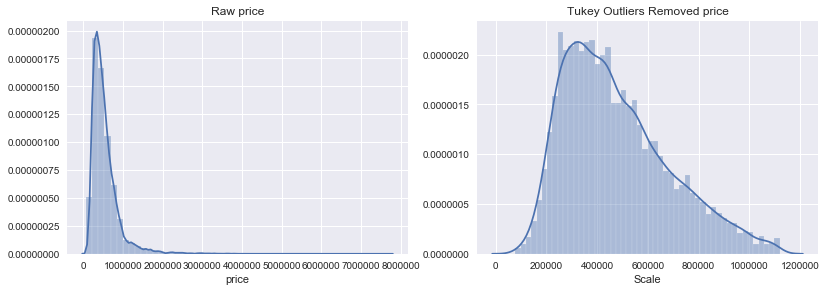

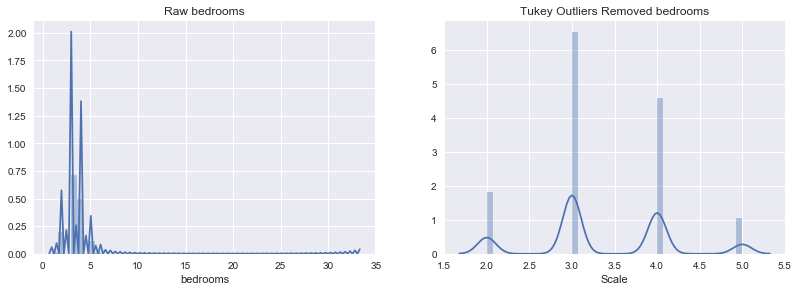

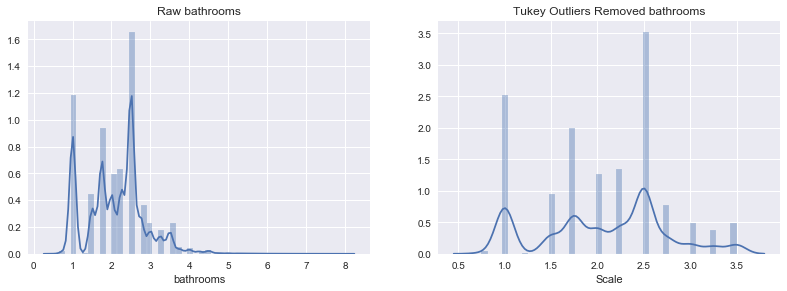

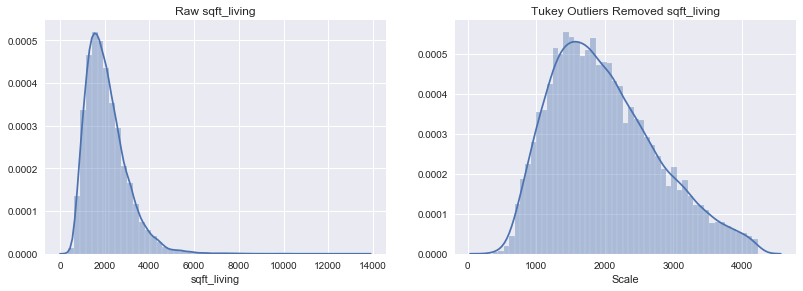

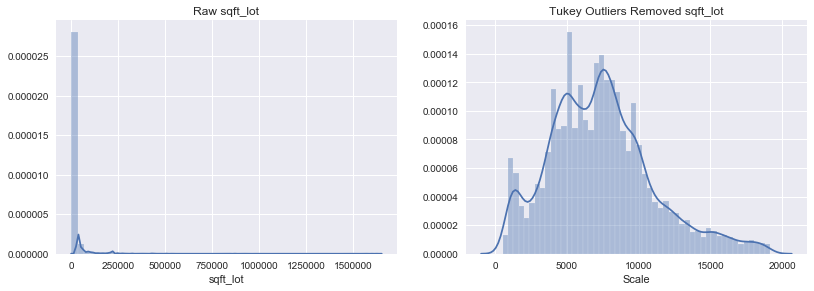

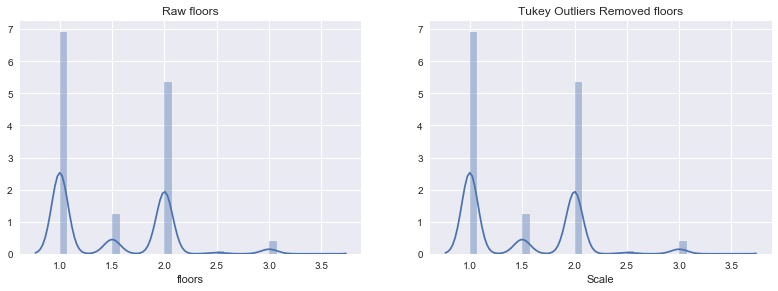

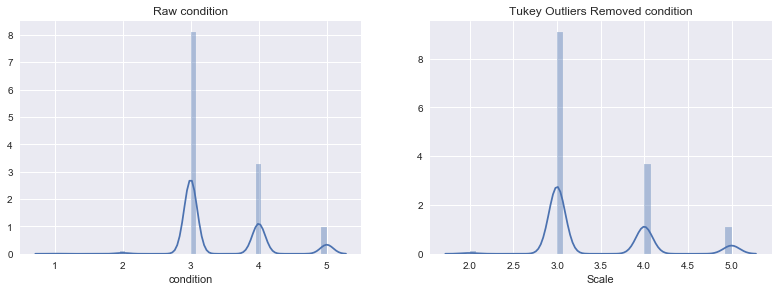

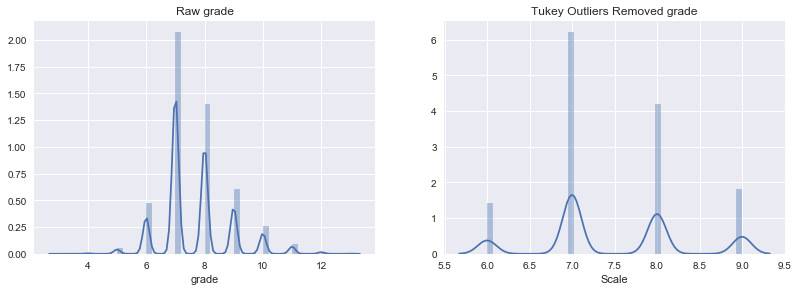

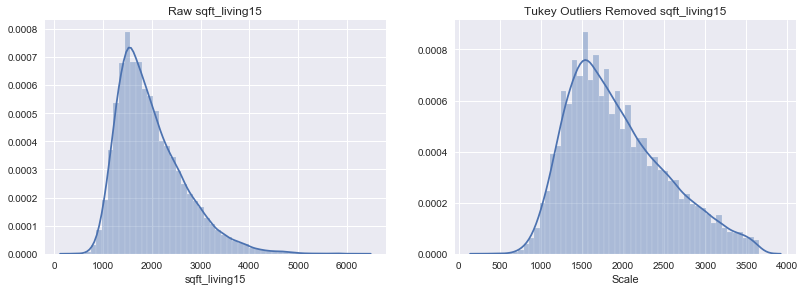

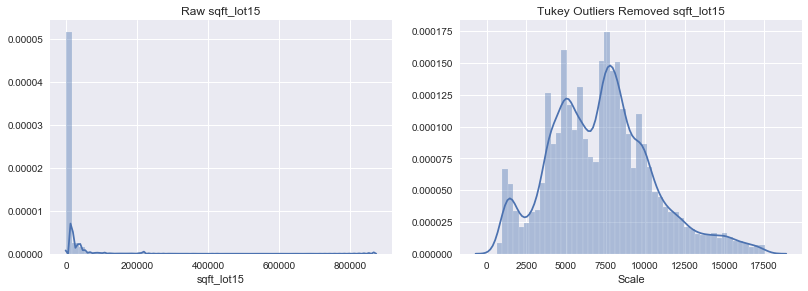

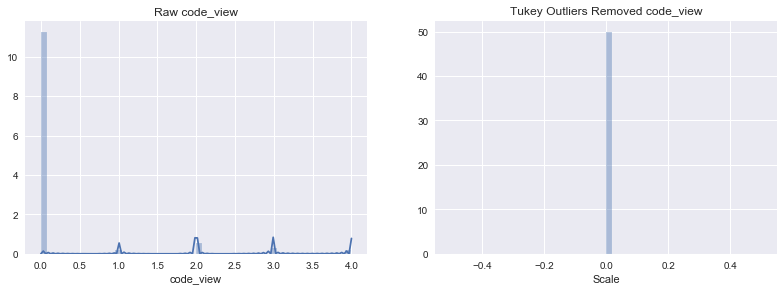

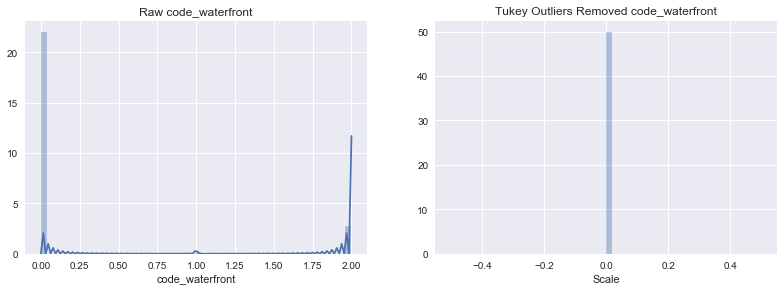

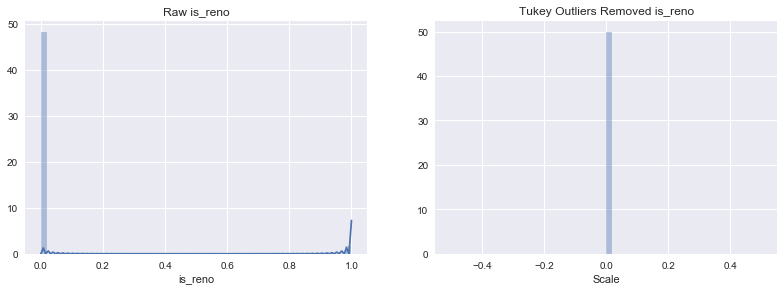

In [63]:
from collections import Counter
from sklearn.preprocessing import RobustScaler
robscaler = RobustScaler()

# vars_to_norm = ['sqft_living','sqft_lot','sqft_living15','sqft_lot15','bedrooms','bathrooms']
norm_results = [['column','K_square','p-val']]

# Graph all potential normalizedvariables
for var_name in df.describe():

    var = df[var_name]
    fig = plt.figure(figsize=(12,4))
    ax1 = fig.add_subplot(121)
    ax1 = sns.distplot(var, norm_hist=True) 
    ax1.set_title('Raw '+var_name)
    #robscaler.fit_transform(np.array(var).reshape(-1,1)
    
    # OUTLIER REMOVAL
    outliers_to_drop = detect_outliers(df,0,[var_name])
    var_clean =df[var_name].drop(outliers_to_drop)
    
    ax2 = fig.add_subplot(122)
    
    ax2 = sns.distplot(var_clean,norm_hist=True)
#     ax2 = sns.distplot(robscaler.fit_transform(np.array(var_clean).reshape(-1,1)),norm_hist=True)
    
    ax2.set_title('Tukey Outliers Removed '+var_name) #+var)
    ax2.set_xlabel('Scale')
    stat, p = normtest(var_clean)
#     norm_results.append([var_clean,stat, p])
# norm_results = pd.DataFrame(norm_results[2:],columns=norm_results[0])#,index='columns')
# norm_results

### Question/Answer 3B: Does removal of outliers improve the distrubtions?

- The data is skewed by outliers.
    - Comparing it to IQR-method outlier elimination reveals much improved results
    - The distributions look much more reasonabile with outliers removed.

## REMOVING OUTLIERS

#### Recall stats observations from beginning of EDA:
> #### Notes on basic statistics
>- Bedrooms has some very clear outliers (max is 33, but 75% quartile is only 4)
>    - May want to remove outliers after Z-scoring (Absolute Z-score > 3)
>- Same with bathrooms (8 is max, 75% quartile is only 2.5)
>- Same with sqft_living (max 13540, 75% quartile = 2550) 
>- Also same with sqft_lot15, sqftliving15

In [64]:
# DEFINE VARIABLES TO GET THE OUTLIERS FOR (based on observations)
# vars_to_norm = ['price','bedrooms''sqft_living','sqft_lot','sqft_living15','sqft_lot15','bedrooms','bathrooms'
vars_to_clean = ['price','bedrooms','sqft_living','bathrooms','sqft_living15']

In [65]:
# GET OUTLIER INDICES AND REPORT 

outliers_to_drop = {}

for col in vars_to_clean:
    outliers_to_drop[col] = detect_outliers(df,0,[col])
# outliers_to_drop.keys()
# outliers_to_drop.values()

# Print out # of outliers
for k, v in outliers_to_drop.items():
    print(f'col: {k} has {len(v)} outliers. ({round(len(v)/len(df),2)*100}%)' )

col: price has 1131 outliers. (5.0%)
col: bedrooms has 511 outliers. (2.0%)
col: sqft_living has 557 outliers. (3.0%)
col: bathrooms has 546 outliers. (3.0%)
col: sqft_living15 has 532 outliers. (3.0%)


### Filling in df_norm

In [66]:
# Intialize df_norm with df's values
df_norm=df.copy()

In [67]:
# Iterate throught outliers_to_drop dictionary to replace outliers with np.nan
for k, v in outliers_to_drop.items():
    df_norm.loc[v,k] = np.nan # axis=0,inplace=True)

# Display null values
df_norm.isna().sum()

price                1131
bedrooms              511
bathrooms             546
sqft_living           557
sqft_lot                0
floors                  0
condition               0
grade                   0
zipcode                 0
sqft_living15         532
sqft_lot15              0
code_view               0
code_waterfront         0
is_reno                 0
bins_yrbuilt            0
bins_sqftbasement       0
bins_sqftabove          0
dtype: int64

In [68]:
# REMOVING OUTLIERS FROM PRICE
drop_col = 'price'

print(f'for {drop_col}:')
print(f'# of intial rows: {len(df_norm)}')
df_norm.dropna(subset=['price'],inplace=True)
print(f'# after dropping rows: {len(df_norm)}')
print(f'\nOutliers remaining: \n{df_norm.isna().sum()}')

for price:
# of intial rows: 21082
# after dropping rows: 19951

Outliers remaining: 
price                  0
bedrooms             449
bathrooms            253
sqft_living          169
sqft_lot               0
floors                 0
condition              0
grade                  0
zipcode                0
sqft_living15        231
sqft_lot15             0
code_view              0
code_waterfront        0
is_reno                0
bins_yrbuilt           0
bins_sqftbasement      0
bins_sqftabove         0
dtype: int64


In [69]:
# REMOVING OUTLIERS FROM BEDROOMS
drop_col = 'bedrooms'

print(f'for {drop_col}:')
print(f'# of intial rows: {len(df_norm)}')
df_norm.dropna(subset=[drop_col],inplace=True)
print(f'# after dropping rows: {len(df_norm)}')
print(f'\nOutliers remaining: \n{df_norm.isna().sum()}')

for bedrooms:
# of intial rows: 19951
# after dropping rows: 19502

Outliers remaining: 
price                  0
bedrooms               0
bathrooms            196
sqft_living          150
sqft_lot               0
floors                 0
condition              0
grade                  0
zipcode                0
sqft_living15        228
sqft_lot15             0
code_view              0
code_waterfront        0
is_reno                0
bins_yrbuilt           0
bins_sqftbasement      0
bins_sqftabove         0
dtype: int64


In [70]:
# REMOVING OUTLIERS FROM PRICE

drop_col = 'sqft_living'

print(f'for {drop_col}:')
print(f'# of intial rows: {len(df_norm)}')
df_norm.dropna(subset=[drop_col],inplace=True)
print(f'# after dropping rows: {len(df_norm)}')
print(f'\nOutliers remaining: \n{df_norm.isna().sum()}')

for sqft_living:
# of intial rows: 19502
# after dropping rows: 19352

Outliers remaining: 
price                  0
bedrooms               0
bathrooms            147
sqft_living            0
sqft_lot               0
floors                 0
condition              0
grade                  0
zipcode                0
sqft_living15        176
sqft_lot15             0
code_view              0
code_waterfront        0
is_reno                0
bins_yrbuilt           0
bins_sqftbasement      0
bins_sqftabove         0
dtype: int64


In [71]:
# REMOVING OUTLIERS FROM BATHROOMS
drop_col = 'bathrooms'

print(f'for {drop_col}:')
print(f'# of intial rows: {len(df_norm)}')
df_norm.dropna(subset=[drop_col],inplace=True)
print(f'# after dropping rows: {len(df_norm)}')
print(f'\nOutliers remaining: \n{df_norm.isna().sum()}')

for bathrooms:
# of intial rows: 19352
# after dropping rows: 19205

Outliers remaining: 
price                  0
bedrooms               0
bathrooms              0
sqft_living            0
sqft_lot               0
floors                 0
condition              0
grade                  0
zipcode                0
sqft_living15        152
sqft_lot15             0
code_view              0
code_waterfront        0
is_reno                0
bins_yrbuilt           0
bins_sqftbasement      0
bins_sqftabove         0
dtype: int64


In [72]:
drop_col = 'sqft_living15'

print(f'for {drop_col}:')
print(f'# of intial rows: {len(df_norm)}')
df_norm.dropna(subset=[drop_col],inplace=True)
print(f'# after dropping rows: {len(df_norm)}')
print(f'\nOutliers remaining: \n{df_norm.isna().sum()}')

for sqft_living15:
# of intial rows: 19205
# after dropping rows: 19053

Outliers remaining: 
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
condition            0
grade                0
zipcode              0
sqft_living15        0
sqft_lot15           0
code_view            0
code_waterfront      0
is_reno              0
bins_yrbuilt         0
bins_sqftbasement    0
bins_sqftabove       0
dtype: int64


## NORMALIZING UNITS (RobustScaler)

In [73]:
# ADDING OUTLIER REMOVAL FROM preprocessing.RobuseScaler
from sklearn.preprocessing import RobustScaler

robscaler = RobustScaler()
robscaler

RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)

In [74]:
vars_to_scale = ['sqft_living','sqft_lot','sqft_living15','sqft_lot15','bedrooms','bathrooms']

for col in vars_to_scale:
            
    col_data = np.array(np.array(df_norm[col]))
    res = robscaler.fit_transform(col_data.reshape(-1,1)) #,df['price'])
    df_norm['sca_'+col] = res.flatten()

In [75]:
# IF DROPPING VARS UNCOMMENT BELOW
# df_norm.drop(vars_to_scale,axis=1,inplace=True)

In [76]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 21596
Data columns (total 23 columns):
price                19053 non-null float64
bedrooms             19053 non-null float64
bathrooms            19053 non-null float64
sqft_living          19053 non-null float64
sqft_lot             19053 non-null int64
floors               19053 non-null float64
condition            19053 non-null int64
grade                19053 non-null int64
zipcode              19053 non-null category
sqft_living15        19053 non-null float64
sqft_lot15           19053 non-null int64
code_view            19053 non-null int8
code_waterfront      19053 non-null int8
is_reno              19053 non-null int64
bins_yrbuilt         19053 non-null category
bins_sqftbasement    19053 non-null category
bins_sqftabove       19053 non-null category
sca_sqft_living      19053 non-null float64
sca_sqft_lot         19053 non-null float64
sca_sqft_living15    19053 non-null float64
sca_sqft_lot15       19

In [77]:
df_norm.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,sqft_living15,...,is_reno,bins_yrbuilt,bins_sqftbasement,bins_sqftabove,sca_sqft_living,sca_sqft_lot,sca_sqft_living15,sca_sqft_lot15,sca_bedrooms,sca_bathrooms
0,221900.0,3.0,1.00,1180.0,5650,1.0,3,7,98178,1340.0,...,0,"(1950.0, 1960.0]","(-inf, 1.0]","(1000.0, 1500.0]",-0.663265,-0.355075,-0.569620,-0.391872,0.0,-1.00
1,538000.0,3.0,2.25,2570.0,7242,2.0,3,7,98125,1690.0,...,1,"(1950.0, 1960.0]","(1.0, 501.0]","(2000.0, 2500.0]",0.755102,-0.047858,-0.126582,0.026953,0.0,0.25
2,180000.0,2.0,1.00,770.0,10000,1.0,3,6,98028,2720.0,...,0,"(1930.0, 1940.0]","(-inf, 1.0]","(500.0, 1000.0]",-1.081633,0.484369,1.177215,0.116024,-1.0,-1.00
3,604000.0,4.0,3.00,1960.0,5000,1.0,5,7,98136,1360.0,...,0,"(1960.0, 1970.0]","(501.0, 1001.0]","(1000.0, 1500.0]",0.132653,-0.480509,-0.544304,-0.528743,1.0,1.00
4,510000.0,3.0,2.00,1680.0,8080,1.0,3,8,98074,1800.0,...,0,"(1980.0, 1990.0]","(-inf, 1.0]","(1500.0, 2000.0]",-0.153061,0.113856,0.012658,-0.001685,0.0,0.00



####  Normalizing by log+z-score (OLD) 

In [78]:
# # Normalize chosen vars
# # df_norm = pd.DataFrame({})
# df_norm['logz_price'] = log_z(df['price'])
# df_norm['logz_sqft_living'] = log_z(df['sqft_living'])a
# df_norm['logz_sqft_living15'] = log_z(df['sqft_living15'])
# df_norm['logz_sqft_lot'] = log_z(df['sqft_lot'])
# df_norm['logz_sqft_lot15'] = log_z(df['sqft_lot15'])
# df_norm.index = df.index


#### Normalizing to z-score + removing >3 STD (OLD)

In [79]:
# Z-SCORE AND REMOVE >3 STD 
# vars_dont_norm = ['yr_renovated','yr_built','floors','view','grade','condition']
# vars_to_norm = df.describe().drop(vars_dont_norm,axis=1).columns
# vars_to_rem_out = None

# col_names =vars_to_rem_out
# df_norm = df[vars_to_norm].copy()
# df_norm['id'] = df['id'].copy()
# df_norm.set_index('id')
# df_norm.info()
                  
# for col in col_names:
#       if col != 'id':
#         df_norm['zClean_'+col] = rem_out_z(df[col])
#     # df_norm  = df_norm.filter(regex=('log'),axis=1)
# df_norm.info()

In [80]:
# Drop na
# # df_run = pd.DataFrame({)
# temp_df = df.filter(regex=('bin'),axis=1)
# df_run = pd.concat([df_norm,temp_df],axis=1)#,sort=False)
# df_run.describe()

In [81]:
# # LOG TRANSFORM AND Z-SCORE DATA
# col_names = vars_to_norm
# df_norm = df[vars_to_norm].copy()
# # df_norm.info()
# for col in col_names:
#     data_to_log = df.loc[df[col]>0]
#     df_norm['logZ_'+col] = log_z(data_to_log[col])
# #     df_norm['logZ_'+col] = log_z(df[col])
# df_norm  = df_norm.filter(regex=('log'),axis=1)
# df_norm.info()

# CHECKING NORMALIZED DATASET

,0,1,2
0,column,K_square,p-val


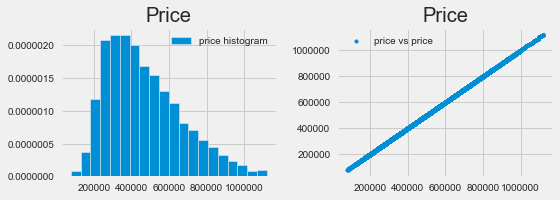

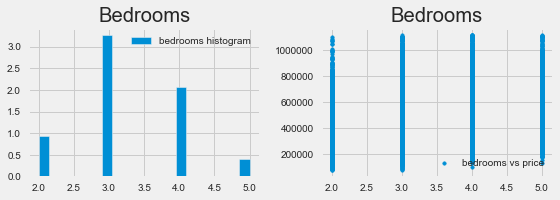

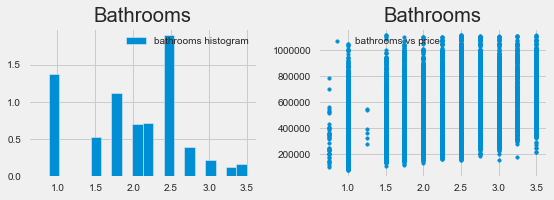

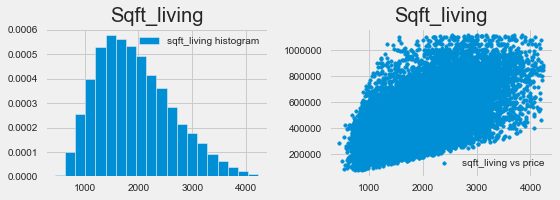

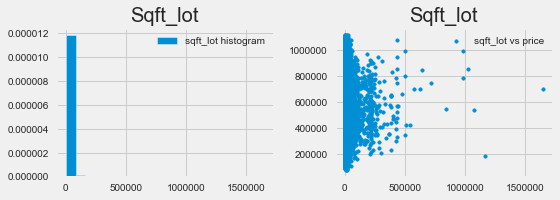

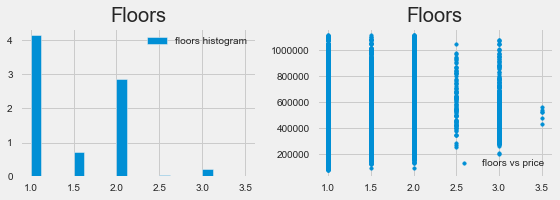

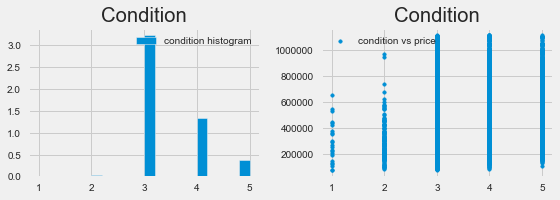

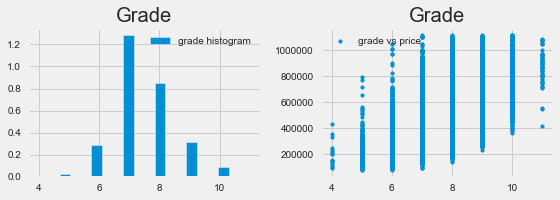

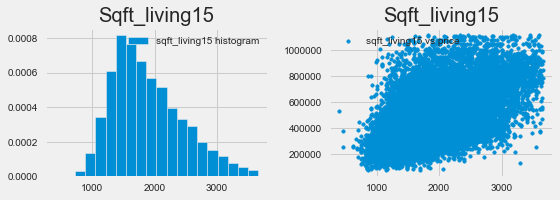

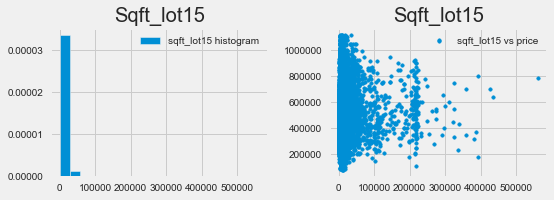

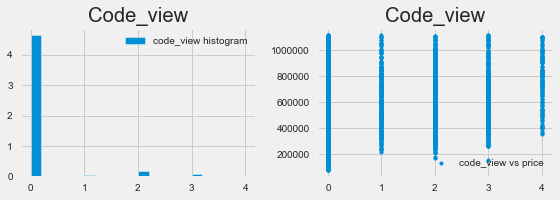

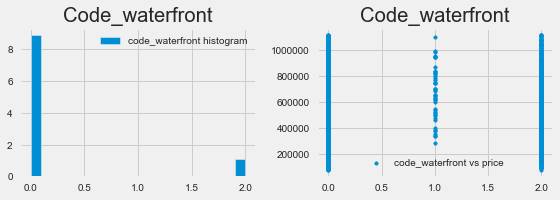

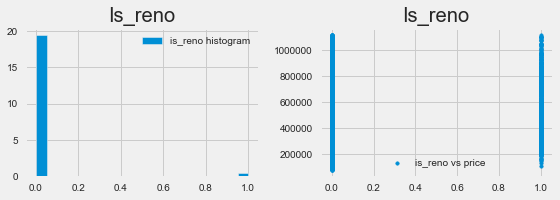

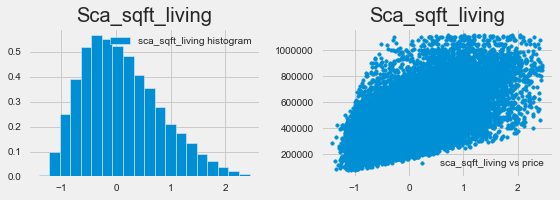

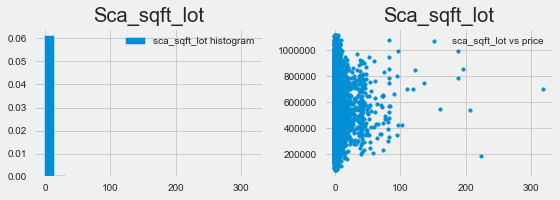

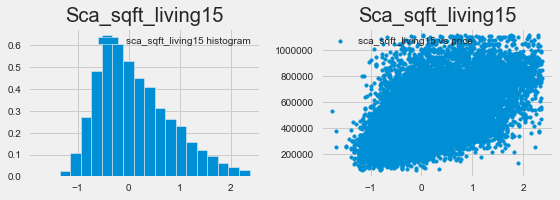

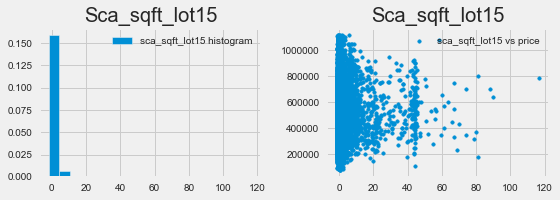

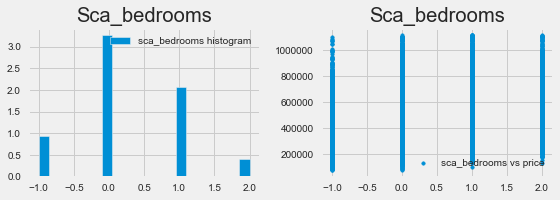

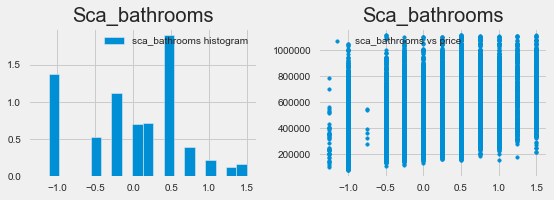

In [82]:
plt.style.use('fivethirtyeight')
plot_hist_scat(df_norm)

In [83]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 21596
Data columns (total 23 columns):
price                19053 non-null float64
bedrooms             19053 non-null float64
bathrooms            19053 non-null float64
sqft_living          19053 non-null float64
sqft_lot             19053 non-null int64
floors               19053 non-null float64
condition            19053 non-null int64
grade                19053 non-null int64
zipcode              19053 non-null category
sqft_living15        19053 non-null float64
sqft_lot15           19053 non-null int64
code_view            19053 non-null int8
code_waterfront      19053 non-null int8
is_reno              19053 non-null int64
bins_yrbuilt         19053 non-null category
bins_sqftbasement    19053 non-null category
bins_sqftabove       19053 non-null category
sca_sqft_living      19053 non-null float64
sca_sqft_lot         19053 non-null float64
sca_sqft_living15    19053 non-null float64
sca_sqft_lot15       19

## Recheck multipol


Text(0.5, 1.0, 'Scaled Data only')

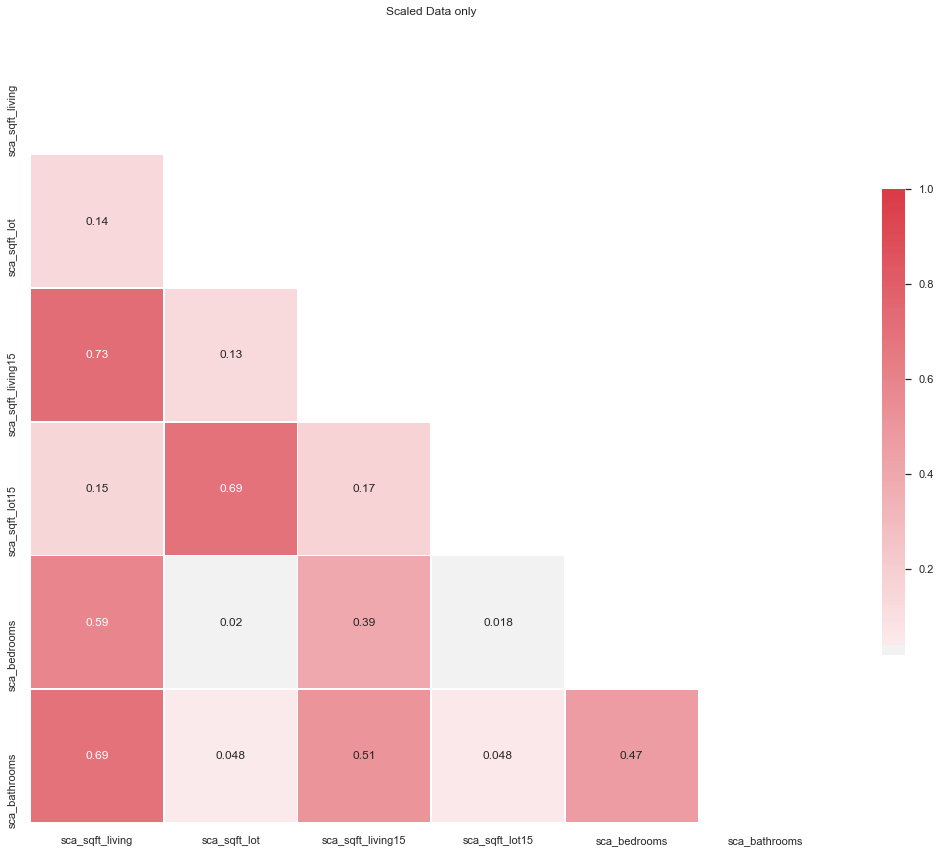

In [84]:
multiplot(df_norm.filter(regex='sca',axis=1))
plt.title('Scaled Data only')

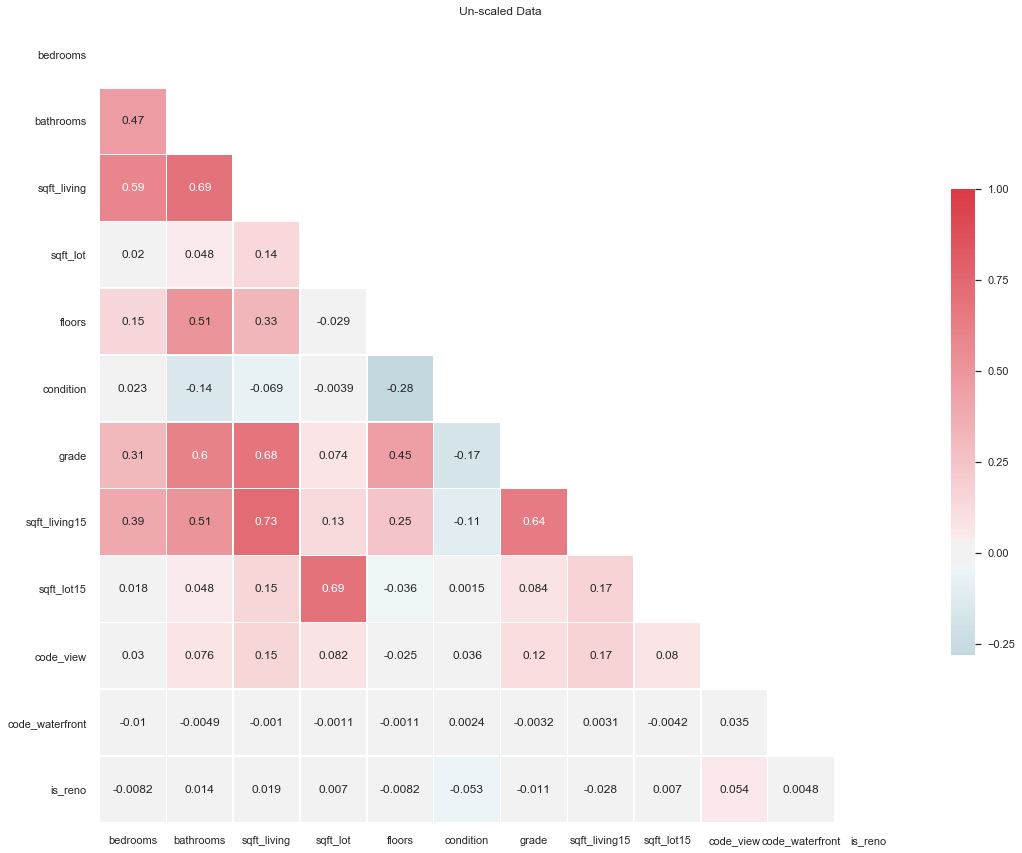

In [85]:
X =df_norm.loc[:,~(df_norm.columns.str.startswith('sca'))]
multiplot(X.drop('price',axis=1))
plt.title('Un-scaled Data')
X=[]

#### No multicollinearity to worry about. Huzzah!

In [86]:
# DEFINING DATASET TO RUN (df_run)
df_run = df_norm.copy()
# df_run.to_csv('df_run_pre_codes.csv')
df_run.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 21596
Data columns (total 23 columns):
price                19053 non-null float64
bedrooms             19053 non-null float64
bathrooms            19053 non-null float64
sqft_living          19053 non-null float64
sqft_lot             19053 non-null int64
floors               19053 non-null float64
condition            19053 non-null int64
grade                19053 non-null int64
zipcode              19053 non-null category
sqft_living15        19053 non-null float64
sqft_lot15           19053 non-null int64
code_view            19053 non-null int8
code_waterfront      19053 non-null int8
is_reno              19053 non-null int64
bins_yrbuilt         19053 non-null category
bins_sqftbasement    19053 non-null category
bins_sqftabove       19053 non-null category
sca_sqft_living      19053 non-null float64
sca_sqft_lot         19053 non-null float64
sca_sqft_living15    19053 non-null float64
sca_sqft_lot15       19

## CAT.CODES FOR BINNED DATA 

In [87]:
df_filt = pd.DataFrame({})

df_filt = df_run.filter(regex=('bins_'),axis =1).copy()
df_filt['zipcode']=df_run['zipcode'].copy()
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 21596
Data columns (total 4 columns):
bins_yrbuilt         19053 non-null category
bins_sqftbasement    19053 non-null category
bins_sqftabove       19053 non-null category
zipcode              19053 non-null category
dtypes: category(4)
memory usage: 227.0 KB


In [88]:
# Creating binned vars cat codes
for col in df_filt:
    df_filt['code'+col] = df_filt[col].cat.codes
    df_filt.drop(col,axis=1,inplace=True)
df_filt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 21596
Data columns (total 4 columns):
codebins_yrbuilt         19053 non-null int8
codebins_sqftbasement    19053 non-null int8
codebins_sqftabove       19053 non-null int8
codezipcode              19053 non-null int8
dtypes: int8(4)
memory usage: 223.3 KB


In [89]:
df_filt.head()

,codebins_yrbuilt,codebins_sqftbasement,codebins_sqftabove,codezipcode
0,5,0,2,66
1,5,1,4,55
2,3,0,1,16
3,6,2,2,58
4,8,0,3,37


## Concatenate final df for modeling (df_run)

In [90]:
## Select columns that do not contain the string 'logZ'
# df_run =df_run.loc[:,~(df_run.columns.str.startswith('logZ'))]

In [91]:
# # df_filt['price'] = df_run['price'].copy()
# df_run =df_run.loc[:,~(df_run.columns.str.startswith('bin'))]
# df_run.info()

In [92]:
# # DECIDE NOW IF WANT CLEAN OR NOT CLEANED DATA

# to_drop_unclean = ['bedrooms','bathrooms','sqft_living','sqft_lot','sqft_living15','sqft_lot15','zClean_price']
# to_drop_clean = list(df_run.loc[:,~(df_run.columns.str.startswith('zClean'))].columns)
# to_drop_unclean, to_drop_clean

In [93]:
# DROP UNCLEAN
# df_run.drop(['id','bedrooms','bathrooms','sqft_living','sqft_lot','sqft_living15','sqft_lot15','zClean_price'],axis=1,inplace=True)
# df_run.drop(to_drop_unclean,axis=1,inplace=True)

In [94]:
# Concatenate codebins from df_filt + df_run
df_run = pd.concat([df_run, df_filt],axis=1)  #).filter(regex=('code'))],axis=1)
df_run.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 21596
Data columns (total 27 columns):
price                    19053 non-null float64
bedrooms                 19053 non-null float64
bathrooms                19053 non-null float64
sqft_living              19053 non-null float64
sqft_lot                 19053 non-null int64
floors                   19053 non-null float64
condition                19053 non-null int64
grade                    19053 non-null int64
zipcode                  19053 non-null category
sqft_living15            19053 non-null float64
sqft_lot15               19053 non-null int64
code_view                19053 non-null int8
code_waterfront          19053 non-null int8
is_reno                  19053 non-null int64
bins_yrbuilt             19053 non-null category
bins_sqftbasement        19053 non-null category
bins_sqftabove           19053 non-null category
sca_sqft_living          19053 non-null float64
sca_sqft_lot             19053 non-null

In [95]:
df_run.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,zipcode,sqft_living15,...,sca_sqft_living,sca_sqft_lot,sca_sqft_living15,sca_sqft_lot15,sca_bedrooms,sca_bathrooms,codebins_yrbuilt,codebins_sqftbasement,codebins_sqftabove,codezipcode
0,221900.0,3.0,1.00,1180.0,5650,1.0,3,7,98178,1340.0,...,-0.663265,-0.355075,-0.569620,-0.391872,0.0,-1.00,5,0,2,66
1,538000.0,3.0,2.25,2570.0,7242,2.0,3,7,98125,1690.0,...,0.755102,-0.047858,-0.126582,0.026953,0.0,0.25,5,1,4,55


#### Clever line of code to select columns by name

```python
# Select columns that do not contain the string 'logZ'
df_run =df_run.loc[:,~(df_run.columns.str.startswith('logZ'))]
```

### Saving/loading df_run after cleaning up

In [96]:
# bookmark 202am
# df_run.to_csv('df_run_coded.csv')

In [97]:
# df_run = pd.read_csv('df_run_coded.csv')
# df_run.info()

# FITTING AN INTIAL MODEL:

In [98]:
df_run.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 21596
Data columns (total 27 columns):
price                    19053 non-null float64
bedrooms                 19053 non-null float64
bathrooms                19053 non-null float64
sqft_living              19053 non-null float64
sqft_lot                 19053 non-null int64
floors                   19053 non-null float64
condition                19053 non-null int64
grade                    19053 non-null int64
zipcode                  19053 non-null category
sqft_living15            19053 non-null float64
sqft_lot15               19053 non-null int64
code_view                19053 non-null int8
code_waterfront          19053 non-null int8
is_reno                  19053 non-null int64
bins_yrbuilt             19053 non-null category
bins_sqftbasement        19053 non-null category
bins_sqftabove           19053 non-null category
sca_sqft_living          19053 non-null float64
sca_sqft_lot             19053 non-null

## DETERMINING IDEAL FEATURES TO USE 

- Use MinMaxScaler to get on same scale
- Use RFE to find the best features
- Get ranking of feature importance (from both scaled and unscaled data)

In [99]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

import sklearn.metrics as metrics

In [100]:
df_run.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 21596
Data columns (total 27 columns):
price                    19053 non-null float64
bedrooms                 19053 non-null float64
bathrooms                19053 non-null float64
sqft_living              19053 non-null float64
sqft_lot                 19053 non-null int64
floors                   19053 non-null float64
condition                19053 non-null int64
grade                    19053 non-null int64
zipcode                  19053 non-null category
sqft_living15            19053 non-null float64
sqft_lot15               19053 non-null int64
code_view                19053 non-null int8
code_waterfront          19053 non-null int8
is_reno                  19053 non-null int64
bins_yrbuilt             19053 non-null category
bins_sqftbasement        19053 non-null category
bins_sqftabove           19053 non-null category
sca_sqft_living          19053 non-null float64
sca_sqft_lot             19053 non-null

In [101]:
# Define selector function combining RFE and linear regression
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=1)

# Drop already scaled variables for this feature testing
X =df_run.loc[:,~(df_run.columns.str.startswith(('bins','zip')))]
X = X.drop('price',axis=1)

# RUNNING RFE ON THE UNSCALED DATA(DEMONSTRATION)
Y = df_run['price']
# Y = df_run['logz_price']
# X = df_run.drop(['price'],axis=1)

In [102]:
# Checking X
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 21596
Data columns (total 22 columns):
bedrooms                 19053 non-null float64
bathrooms                19053 non-null float64
sqft_living              19053 non-null float64
sqft_lot                 19053 non-null int64
floors                   19053 non-null float64
condition                19053 non-null int64
grade                    19053 non-null int64
sqft_living15            19053 non-null float64
sqft_lot15               19053 non-null int64
code_view                19053 non-null int8
code_waterfront          19053 non-null int8
is_reno                  19053 non-null int64
sca_sqft_living          19053 non-null float64
sca_sqft_lot             19053 non-null float64
sca_sqft_living15        19053 non-null float64
sca_sqft_lot15           19053 non-null float64
sca_bedrooms             19053 non-null float64
sca_bathrooms            19053 non-null float64
codebins_yrbuilt         19053 non-null int

In [103]:
# Run regressions on X,Y 
selector = selector.fit(X,Y)

# Saving unscaled rankings for demo purposes
no_scale = selector.ranking_

In [104]:
# Scale all variables to value between 0-1 to use RFE to determine which features are the most important for determining price?
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Scale the data before running RFE
print('Consider revisiting this step and dummy-coding zipcode.')

# ONLY SCALE NON-CATEGORICAL, ONE-HOT CATEGORICAL
scaler.fit(X,Y)
scaled_data = scaler.transform(X)
scaled_data.shape

Consider revisiting this step and dummy-coding zipcode.


C:\Users\james\Anaconda3\envs\learn-env_MD\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


(19053, 22)

In [105]:
# Running RFE with scaled data
selector = selector.fit(scaled_data, Y) 
scaled = selector.ranking_

In [106]:
# Create a dataframe with the ranked values of each feature for both scaled and unscaled data
best_features = pd.DataFrame({'columns':X.columns, 'scaled_rank' : scaled,'unscaled_rank':no_scale})
best_features.set_index('columns',inplace=True)

In [107]:
# Display dataframe (sorted based on unscaled rank)
best_features.sort_values('unscaled_rank')

,scaled_rank,unscaled_rank
columns,,
grade,1,1
code_view,8,2
codebins_sqftbasement,11,3
codebins_sqftabove,21,4
floors,9,5
codebins_yrbuilt,3,6
sca_bathrooms,18,7
is_reno,20,8
condition,13,9


Text(0, 0.5, 'Features Importance')

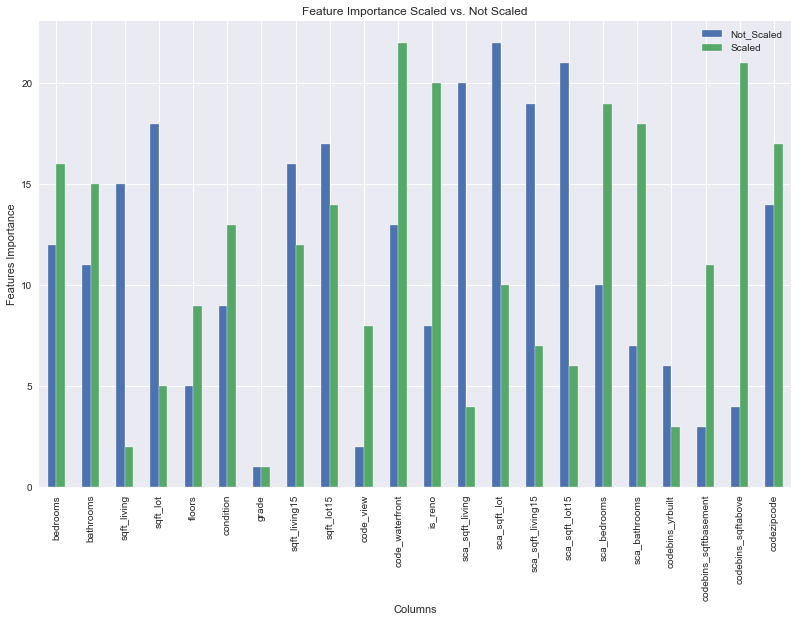

In [108]:
# Plot the difference in feature importance between analyzing scaled and unscaled data. 
# For demonstration purposes.
features = pd.DataFrame({'Columns':X.columns, 'Not_Scaled':no_scale, 'Scaled':scaled})
# PLot the difference between 
plt.style.use('seaborn')
# plt.xkcd()
ax = features.set_index('Columns').plot(kind = 'bar',figsize=(12,8))
ax.set_title('Feature Importance Scaled vs. Not Scaled')
ax.set_ylabel('Features Importance')

### Using elbow plots to identify the best # of features to use 

In [109]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 21596
Data columns (total 22 columns):
bedrooms                 19053 non-null float64
bathrooms                19053 non-null float64
sqft_living              19053 non-null float64
sqft_lot                 19053 non-null int64
floors                   19053 non-null float64
condition                19053 non-null int64
grade                    19053 non-null int64
sqft_living15            19053 non-null float64
sqft_lot15               19053 non-null int64
code_view                19053 non-null int8
code_waterfront          19053 non-null int8
is_reno                  19053 non-null int64
sca_sqft_living          19053 non-null float64
sca_sqft_lot             19053 non-null float64
sca_sqft_living15        19053 non-null float64
sca_sqft_lot15           19053 non-null float64
sca_bedrooms             19053 non-null float64
sca_bathrooms            19053 non-null float64
codebins_yrbuilt         19053 non-null int

#### Plot R_squared and MSE for Scaled Data

In [110]:
r_squared = []
for x in range(1, len(X.columns)):
    selector = RFE(linreg, n_features_to_select=x)
    selector.fit(scaled_data, Y)
    linreg.fit(X[X.columns[selector.support_]], Y)
    r_sq = linreg.score(X[X.columns[selector.support_]], Y)
    r_squared.append(r_sq)

In [111]:
# r_squared

In [112]:
from sklearn.metrics import mean_squared_error

mse=[]
for x in range(1, len(X.columns)):
    selector = RFE(linreg,  n_features_to_select=x)
    selector.fit(scaled_data, Y)
    linreg.fit(X[X.columns[selector.support_]], Y)
    y_pred = linreg.predict(X[X.columns[selector.support_]])
    mse.append(mean_squared_error(Y, y_pred))
# mse


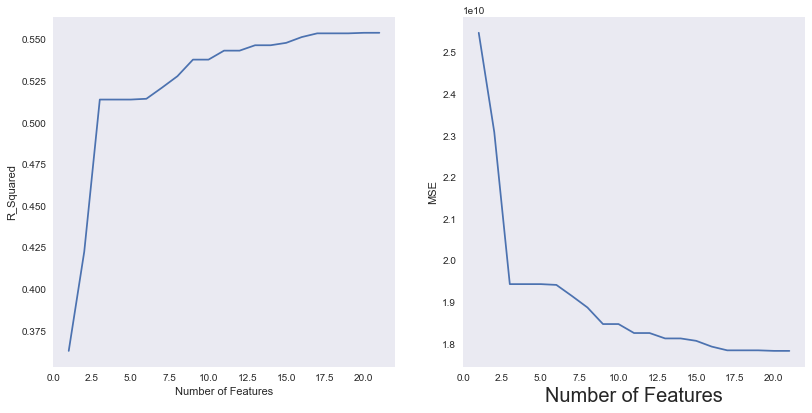

In [113]:
from sklearn.metrics import mean_squared_error

fig = plt.figure(figsize=(12 ,6))

ax1 = plt.subplot(121)
ax1.plot(range(1, len(X.columns)), r_squared)
ax1.set_ylabel('R_Squared')
ax1.set_xlabel('Number of Features')
ax1.grid()

ax2 = plt.subplot(122)
ax2.plot(range(1,len(mse)+1), mse )
ax2.set_ylabel('MSE')

ax2.set_xlabel('Number of Features',fontsize=20)
ax2.grid()


#### Plot R_squared and MSE for Unscaled Data

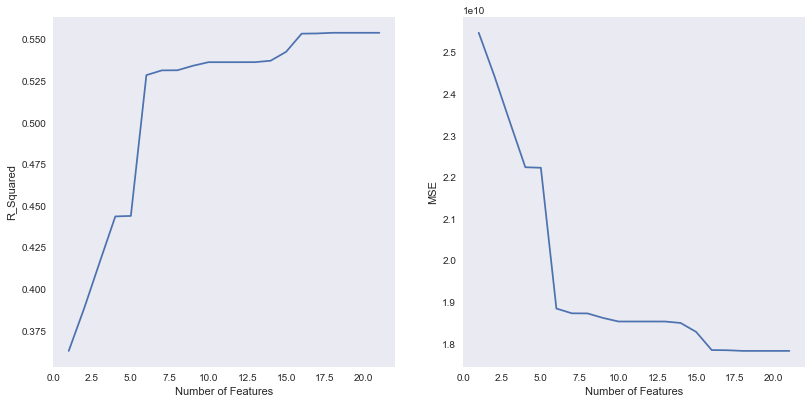

In [114]:
r_squared = []
for x in range(1, len(X.columns)):
    selector = RFE(linreg, n_features_to_select=x)
    selector.fit(X, Y)
    linreg.fit(X[X.columns[selector.support_]], Y)
    r_sq = linreg.score(X[X.columns[selector.support_]], Y)
    r_squared.append(r_sq)

    
from sklearn.metrics import mean_squared_error

mse=[]
for x in range(1, len(X.columns)):
    selector = RFE(linreg,  n_features_to_select=x)
    selector.fit(X, Y)
    linreg.fit(X[X.columns[selector.support_]], Y)
    y_pred = linreg.predict(X[X.columns[selector.support_]])
    mse.append(mean_squared_error(Y, y_pred))



fig = plt.figure(figsize=(12 ,6))

ax1 = plt.subplot(121)
ax1.plot(range(1, len(X.columns)), r_squared)
ax1.set_ylabel('R_Squared')
ax1.set_xlabel('Number of Features')
ax1.grid()

ax2 = plt.subplot(122)
ax2.plot(range(1,len(mse)+1), mse )
ax2.set_ylabel('MSE')

ax2.set_xlabel('Number of Features')
ax2.grid() 


### Choosing Features Based on Rankings
- The above figure is indicating that right now my best possible R2 with the lowest # of features would be with 6 predictors (judging unscaled data). 
- Now examine the sorted best_features dataframe to see which 6 to use

In [115]:
best_features.sort_values('unscaled_rank')

,scaled_rank,unscaled_rank
columns,,
grade,1,1
code_view,8,2
codebins_sqftbasement,11,3
codebins_sqftabove,21,4
floors,9,5
codebins_yrbuilt,3,6
sca_bathrooms,18,7
is_reno,20,8
condition,13,9


In [116]:
# Pull out the 6 best features via ranking 
best_num_feat = 6
selected_features = best_features.sort_values('unscaled_rank')[0:best_num_feat]
selected_features

,scaled_rank,unscaled_rank
columns,,
grade,1,1
code_view,8,2
codebins_sqftbasement,11,3
codebins_sqftabove,21,4
floors,9,5
codebins_yrbuilt,3,6


In [117]:
# USING UNSCALED
selected_features.index

Index(['grade', 'code_view', 'codebins_sqftbasement', 'codebins_sqftabove',
       'floors', 'codebins_yrbuilt'],
      dtype='object', name='columns')

In [118]:
# Check the columns of X
X[selected_features.index].head()

,grade,code_view,codebins_sqftbasement,codebins_sqftabove,floors,codebins_yrbuilt
0,7,0,0,2,1.0,5
1,7,0,1,4,2.0,5
2,6,0,0,1,1.0,3
3,7,0,2,2,1.0,6
4,8,0,0,3,1.0,8


## PRELIMINARY UNIVARIATE LINEAR REGRESSION MODELING

In [119]:
df_run.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 21596
Data columns (total 27 columns):
price                    19053 non-null float64
bedrooms                 19053 non-null float64
bathrooms                19053 non-null float64
sqft_living              19053 non-null float64
sqft_lot                 19053 non-null int64
floors                   19053 non-null float64
condition                19053 non-null int64
grade                    19053 non-null int64
zipcode                  19053 non-null category
sqft_living15            19053 non-null float64
sqft_lot15               19053 non-null int64
code_view                19053 non-null int8
code_waterfront          19053 non-null int8
is_reno                  19053 non-null int64
bins_yrbuilt             19053 non-null category
bins_sqftbasement        19053 non-null category
bins_sqftabove           19053 non-null category
sca_sqft_living          19053 non-null float64
sca_sqft_lot             19053 non-null

In [120]:
# Running simple linear regression for each predictor on its own
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms


# log_price = np.log(df['price'])
# df['log_price'] = log_price

target_var = 'price'
col_names = df_run.drop(['price'],axis=1).columns

# Create results list for saving the output statstics for each predictor
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]] 

for idx, val in enumerate(col_names): 
    
    # Use the names of the columns to determine format of forumla  
    if val.startswith('code'):
        
        df_run[val] = df_run[val].astype('category').cat.as_ordered() 
        f =f'{str(target_var)}~C({val})'
        
    elif val.startswith('bin'):
        
        df_run[val] = df_run[val].cat.as_ordered() 
        f =f'{str(target_var)}~C({val})'
        
    else:
        
        f =f'{str(target_var)}~{val}'
        
    # Run the ols models     
    model = smf.ols(formula=f, data=df_run).fit() 
    model.summary()
    
    # Append results
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ]) 
    
# Turn results into dataframe with correct index and columns
res_df = pd.DataFrame(results)
res_df.columns = res_df.iloc[0]
res_df=res_df[1:]
res_df.set_index('ind_var',inplace=True)
res_df.sort_values('r_squared',ascending=False)

C:\Users\james\Anaconda3\envs\learn-env_MD\lib\site-packages\statsmodels\regression\linear_model.py:1633: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
C:\Users\james\Anaconda3\envs\learn-env_MD\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\james\Anaconda3\envs\learn-env_MD\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\james\Anaconda3\envs\learn-env_MD\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\james\Anaconda3\envs\learn-env_MD\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,r_squared,intercept,slope,p-value
ind_var,,,,
codezipcode,0.498102,280365,-47520.3,0.0002275
zipcode,0.498102,280365,-47520.3,0.0002275
grade,0.362959,-454845,123114,0
sqft_living,0.347657,142997,168.572,0
sca_sqft_living,0.347657,451484,165200,0
sqft_living15,0.27516,118553,184.751,0
sca_sqft_living15,0.27516,449258,145953,0
codebins_sqftabove,0.225333,210050,141861,0.107357
bins_sqftabove,0.225333,210050,141861,0.107357


In [121]:
# Initial variables for modeling
try_modeling = ['codezipcode', 'grade','sca_sqft_living', 'sca_sqft_living15']
# Hmm...realized there are redundant versions of variables and am just selecting the correct versions to use.

#### NOTES FOLLOWING PRELIMINARY LINEAR REGRESSIONS
- Variables that had high R_square with logz_price:
    - New results = ['codezipcode', 'grade','sca_sqft_living', 'sca_sqft_living15']

```python
 try_modeling = try_modeling = ['codezipcode', 'grade','sca_sqft_living', 'sca_sqft_living16']

    
```

## MULTIVARIATE REGRESSIONS

In [122]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import statsmodels.stats.api as sms
from sklearn.preprocessing import MinMaxScaler

# # PUTTING TOGETHER THE PREDICTORS TO RUN IN THE REGRESSION
# ## Last min dummy vars []'cat_grade','cat_zipcode','cat_view','cat_bins_sqft_above','cat_bins_sqft_basement']
# dum_grades = pd.get_dummies(df_run['cat_grade'],prefix='gr').iloc[:,:-1]
# dum_view = pd.get_dummies(df_run['cat_view'], prefix='view').iloc[:,:-1]
# dum_sqft_above = pd.get_dummies(df_run['cat_bins_sqftabove'],prefix='sqftAb').iloc[:,:-1]
# dum_sqft_base = pd.get_dummies(df_run['cat_bins_sqftbasement'],prefix='sqftBa').iloc[:,:-1]


# RUNNING K-FOLD VALIDATION WITH STATSMODELS OLS.
# X = df_run.drop(['price','logZ_price'],axis=1)
# list_predictors = ['logZ_sqft_living','logZ_sqft_living15','bedrooms','bathrooms','floors']
# scaler = MinMaxScaler()
# sel_columns = selected_features.index

In [123]:
# Define X, Y 
X = df_run[try_modeling]
# X.columns

Y = df_run['price']
# y = df_run['logZ_price']

# Get a list of predictor names string 
list_predictors = [str(x) for x in X.columns]
list_predictors.append('intercept')
list_predictors

['codezipcode', 'grade', 'sca_sqft_living', 'sca_sqft_living15', 'intercept']

In [124]:
# Comcatenate X,Y for OLS
df_run_ols = pd.concat([Y,X],axis=1)

# Import packages
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats

# Enter equation for selected predictors: (use C to run as categorical) 
# f1 = 'price~C(codezipcode)+C(grade)+sca_sqft_living+sca_sqft_living15' # 0.8 r1 Adjusted
f1 = 'price~C(codezipcode)+grade+sca_sqft_living+sca_sqft_living15' 

# Run model and report sumamry
model = smf.ols(formula=f1, data=df_run_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     1035.
Date:                Thu, 14 Mar 2019   Prob (F-statistic):               0.00
Time:                        01:12:07   Log-Likelihood:            -2.4441e+05
No. Observations:               19053   AIC:                         4.890e+05
Df Residuals:                   18980   BIC:                         4.895e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5152.6368   8731.030      0.590      0.555    -1.2e+04    2.23e+04
C(codezipcode)[T.1]   2.361e+04   8215.662      2.873      0.004    7503.139    3.97e+04
C(codezipcode)[T.2]   2341.0236   7378.061      0.317      0.751   -1.21e+04    1.68e+04
C(codezipcode)[T.3]   5.114e+05   8885.250     57.560      0.000    4.94e+05    5.29e+05
C(codezipcode)[T.4]   3.405e+05   9150.155     37.213      0.000    3.23e+05    3.58e+05
C(codezipcode)[T.5]   2.802e+05   6825.525     41.045      0.000    2.67e+05    2.94e+05
C(codezipcode)[T.6]   2.573e+05   9464.329     27.187      0.000    2.39e+05    2.76e+05
C(codezipcode)[T.7]   2.557e+05   7457.922     34.291      0.000    2.41e+05     2.7e+05
C(codezipcode)[T.8]   1.054e+05   1.05e+04     10.074      0.000    8.49e+04    1.26e+05
C(codezipcode)[T.9]   1.348e+05   8258.863     16.319      0.000    1.19e+05    1.51e+05
C(codezipcode)[T.10]  1.282e+05   9852.210     13.014      0.000    1.09e+05    1.48e+05
C(codezipcode)[T.11]  8.965e+04   8371.036     10.710      0.000    7.32e+04    1.06e+05
C(codezipcode)[T.12]  4.869e+04   7811.281      6.234      0.000    3.34e+04     6.4e+04
C(codezipcode)[T.13] -2.103e+04   6398.367     -3.287      0.001   -3.36e+04   -8487.932
C(codezipcode)[T.14]  1.723e+05   1.21e+04     14.294      0.000    1.49e+05    1.96e+05
C(codezipcode)[T.15]  1.893e+05   6900.034     27.438      0.000    1.76e+05    2.03e+05
C(codezipcode)[T.16]  1.282e+05   7366.804     17.401      0.000    1.14e+05    1.43e+05
C(codezipcode)[T.17]  2.198e+05   7223.982     30.430      0.000    2.06e+05    2.34e+05
C(codezipcode)[T.18]   907.7456   7534.878      0.120      0.904   -1.39e+04    1.57e+04
C(codezipcode)[T.19]  1.147e+04   7391.085      1.552      0.121   -3015.547     2.6e+04
C(codezipcode)[T.20]  3234.7083   9600.539      0.337      0.736   -1.56e+04    2.21e+04
C(codezipcode)[T.21]   3.27e+05   6873.901     47.578      0.000    3.14e+05    3.41e+05
C(codezipcode)[T.22]  1.858e+05   6322.193     29.392      0.000    1.73e+05    1.98e+05
C(codezipcode)[T.23]  3.341e+04   6189.647      5.398      0.000    2.13e+04    4.55e+04
C(codezipcode)[T.24]  6.446e+05   3.72e+04     17.333      0.000    5.72e+05    7.17e+05
C(codezipcode)[T.25]  4.396e+05   8998.802     48.846      0.000    4.22e+05    4.57e+05
C(codezipcode)[T.26]  1.342e+04   6249.489      2.147      0.032    1166.174    2.57e+04
C(codezipcode)[T.27]  1.194e+05   7939.547     15.036      0.000    1.04e+05    1.35e+05
C(codezipcode)[T.28]  2.492e+05   6292.625     39.602      0.000    2.37e+05    2.62e+05
C(codezipcode)[T.29]  2.347e+05   6937.430     33.827      0.000    2.21e+05    2.48e+05
C(codezipcode)[T.30]   4.06e+04   7516.748      5.402      0.000    2.59e+04    5.53e+04
C(codezipcode)[T.31]  1.093e+05   6693.020     16.330    

### Final Model for Validation:
```python
- f1 = 'price ~ C(codezipcode) + grade + sca_sqft_living + sca_sqft_living15' 
```
- price ~ zipcode(category), grade~~(category)~~, sqft_living(scaled to median, RobustScaler) + sqft_living15 (scaled to median, RobustScaler)

### Save df_run_ols to csv

In [125]:
df_run_ols.to_csv('df_run_ols_model.csv')

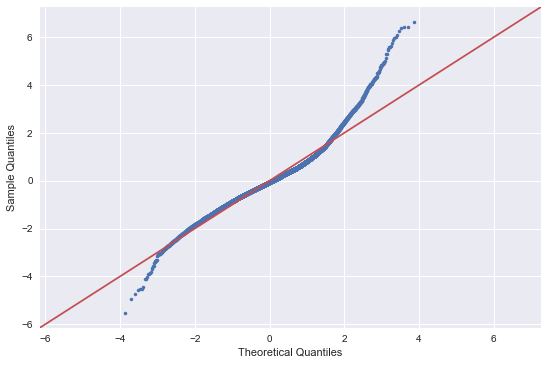

In [126]:
# Visualize Q-Q Plots
resid1=model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True,marker='.')

- Interpreting the Q-Q plot:
    - The Q-Q plot looks a bit crazy and may indicate... outliers? 
    - The only thing I did not check for outliers in final model was zipcode.
    - Will run cross-validation with test-train-split to help decide

,0,1,2
0,column,K_square,p-val


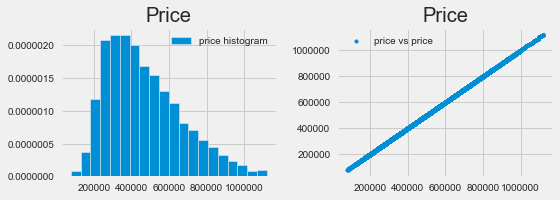

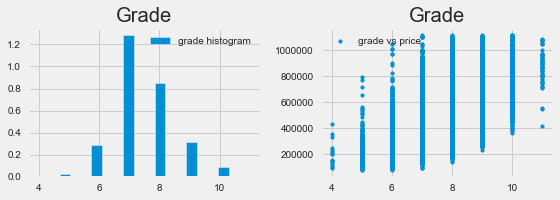

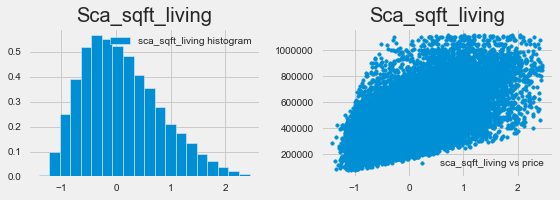

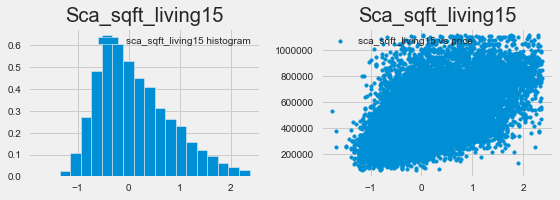

In [127]:
# Visualizing final dataset again.
import matplotlib.pyplot as plt

# Re-inspecting XY
plot_hist_scat(df_run_ols)

# NEW REGRESSION RESULTS


## K-Fold valiation with OLS

In [128]:
# k_fold_val_ols(X,y,k=10):
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

y = df_run['price']


# Run 10-fold cross validation
results = [['set#','R_square_train','MSE_train','R_square_test','MSE_test']]

num_coeff = X.shape[1]

list_predictors = [str(x) for x in X.columns]
list_predictors.append('intercept') 

reg_params = [list_predictors]

i=0
k=10
while i <(k+1):
    X_train, X_test, y_train, y_test = train_test_split(X,y) #,stratify=[cat_col_names])

    data = pd.concat([X_train,y_train],axis=1)
    f1 = 'price~C(codezipcode)+grade+sca_sqft_living+sca_sqft_living15' 
    model = smf.ols(formula=f1, data=data).fit()
    model.summary()
    
    y_hat_train = model.predict(X_train)
    y_hat_test = model.predict(X_test)

    train_residuals = y_hat_train - y_train
    test_residuals = y_hat_test - y_test

        
    train_mse = metrics.mean_squared_error(y_train, y_hat_train)
    test_mse = metrics.mean_squared_error(y_test, y_hat_test)

    R_sqare_train = metrics.r2_score(y_train,y_hat_train)
    R_square_test = metrics.r2_score(y_test,y_hat_test)

    results.append([i,R_sqare_train,train_mse,R_square_test,test_mse])
    i+=1

    
results = pd.DataFrame(results[1:],columns=results[0])
results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     798.2
Date:                Thu, 14 Mar 2019   Prob (F-statistic):               0.00
Time:                        01:12:14   Log-Likelihood:            -1.8321e+05
No. Observations:               14289   AIC:                         3.666e+05
Df Residuals:                   14216   BIC:                         3.671e+05
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             4710.3030   1.01e+04      0.467      0.640    -1.5e+04    2.45e+04
C(codezipcode)[T.1]   2.652e+04   9434.947      2.811      0.005    8027.210     4.5e+04
C(codezipcode)[T.2]   7187.3389   8602.614      0.835      0.403   -9674.911     2.4e+04
C(codezipcode)[T.3]   5.104e+05   1.02e+04     50.087      0.000     4.9e+05     5.3e+05
C(codezipcode)[T.4]   3.467e+05   1.05e+04     32.955      0.000    3.26e+05    3.67e+05
C(codezipcode)[T.5]   2.874e+05   7834.311     36.686      0.000    2.72e+05    3.03e+05
C(codezipcode)[T.6]   2.628e+05   1.08e+04     24.407      0.000    2.42e+05    2.84e+05
C(codezipcode)[T.7]   2.591e+05   8512.656     30.432      0.000    2.42e+05    2.76e+05
C(codezipcode)[T.8]   1.056e+05   1.21e+04      8.756      0.000    8.19e+04    1.29e+05
C(codezipcode)[T.9]   1.319e+05   9649.176     13.667      0.000    1.13e+05    1.51e+05
C(codezipcode)[T.10]  1.248e+05   1.09e+04     11.468      0.000    1.03e+05    1.46e+05
C(codezipcode)[T.11]  9.052e+04   9456.623      9.572      0.000     7.2e+04    1.09e+05
C(codezipcode)[T.12]  4.608e+04   8866.259      5.197      0.000    2.87e+04    6.35e+04
C(codezipcode)[T.13] -2.179e+04   7417.610     -2.937      0.003   -3.63e+04   -7245.597
C(codezipcode)[T.14]  1.649e+05   1.41e+04     11.667      0.000    1.37e+05    1.93e+05
C(codezipcode)[T.15]  1.906e+05   7896.478     24.143      0.000    1.75e+05    2.06e+05
C(codezipcode)[T.16]   1.31e+05   8371.154     15.649      0.000    1.15e+05    1.47e+05
C(codezipcode)[T.17]   2.21e+05   8366.406     26.415      0.000    2.05e+05    2.37e+05
C(codezipcode)[T.18] -1732.1504   8805.592     -0.197      0.844    -1.9e+04    1.55e+04
C(codezipcode)[T.19]  7627.8731   8500.060      0.897      0.370   -9033.357    2.43e+04
C(codezipcode)[T.20]  2043.7667    1.1e+04      0.186      0.853   -1.96e+04    2.36e+04
C(codezipcode)[T.21]  3.285e+05   7967.754     41.232      0.000    3.13e+05    3.44e+05
C(codezipcode)[T.22]  1.827e+05   7273.199     25.123      0.000    1.68e+05    1.97e+05
C(codezipcode)[T.23]   3.53e+04   7184.853      4.913      0.000    2.12e+04    4.94e+04
C(codezipcode)[T.24]  6.387e+05   4.53e+04     14.113      0.000     5.5e+05    7.27e+05
C(codezipcode)[T.25]   4.39e+05   1.03e+04     42.697      0.000    4.19e+05    4.59e+05
C(codezipcode)[T.26]  1.223e+04   7215.085      1.696      0.090   -1909.012    2.64e+04
C(codezipcode)[T.27]  1.204e+05   9081.074     13.257      0.000    1.03e+05    1.38e+05
C(codezipcode)[T.28]  2.489e+05   7229.682     34.432      0.000    2.35e+05    2.63e+05
C(codezipcode)[T.29]  2.343e+05   8092.762     28.958      0.000    2.18e+05     2.5e+05
C(codezipcode)[T.30]  4.229e+04   8881.672      4.761      0.000    2.49e+04    5.97e+04
C(codezipcode)[T.31]  1.109e+05   7766.374     14.284    

In [129]:
results

,set#,R_square_train,MSE_train,R_square_test,MSE_test
0,0,0.797850,8.071612e+09,0.793048,8.306213e+09
1,1,0.800189,8.028599e+09,0.786184,8.421296e+09
2,2,0.801973,7.968423e+09,0.780362,8.615895e+09
3,3,0.796276,8.177485e+09,0.798143,7.980263e+09
4,4,0.797030,8.116704e+09,0.796076,8.149103e+09
5,5,0.797536,8.072597e+09,0.794020,8.308941e+09
6,6,0.797184,8.162420e+09,0.795281,8.025766e+09
7,7,0.797514,8.196509e+09,0.794202,7.923396e+09
8,8,0.798550,8.103241e+09,0.791249,8.199462e+09
9,9,0.798448,8.039613e+09,0.791642,8.394425e+09


## Q-Q Plots

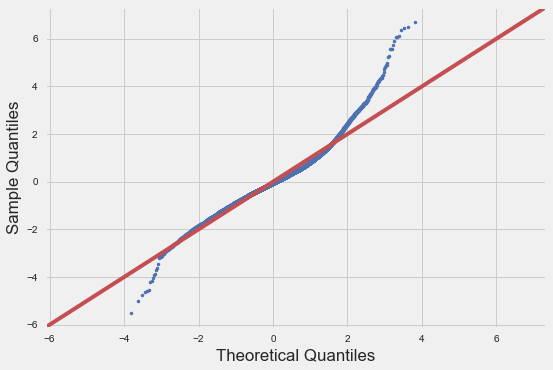

In [130]:
resid1=model.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True,marker='.')

In [131]:
df_model = pd.concat([df_run[try_modeling],df_run['price']],axis=1)
# df_model.to_csv('df_housing_model.csv')
# df_run.to_csv('df_house_all_final_data.csv')

In [132]:
results.describe()

,set#,R_square_train,MSE_train,R_square_test,MSE_test
count,11.000000,11.000000,1.100000e+01,11.000000,1.100000e+01
mean,5.000000,0.798567,8.086906e+09,0.791015,8.253191e+09
std,3.316625,0.001902,7.199360e+07,0.005969,2.184690e+08
min,0.000000,0.796276,7.968423e+09,0.780362,7.923396e+09
25%,2.500000,0.797349,8.034106e+09,0.788717,8.087435e+09
50%,5.000000,0.797850,8.072597e+09,0.793048,8.306213e+09
75%,7.500000,0.799370,8.139562e+09,0.794741,8.407860e+09
max,10.000000,0.801973,8.196509e+09,0.798143,8.615895e+09


# FINAL MODEL - New 
- For k=10 fold validation, with price as target variable:
    - mean r_squared for the test sets was 0.797, with mean MSE = 8.158691e+09
    
  f1 = 'price~C(codezipcode)+C(grade)+sca_sqft_living+sca_sqft_living15' 
- Predictors in final model:
    - 'Zipcode'
    - 'grade'
    - 'sqft_living'
    - 'sqfr_living15'

- My final model indicates that the size, location, and housing geade to be critical components in determining salesprice.

## Predictor Coefficients & Their Affect On Sales Price
- Grade, sqft_living, and sqft_living15 all have straight-forward relationships with sales price, with positive coefficients.
    - sqft_living is a larger component of the price (coefficient: 1.043e+05)
    - grade (coeff: 3.679e+04)and sqft_living15 (coeff: 3.767e+04) have a similar magnitude of an effect on sales price 
- Zipcode is a bit trickier, as each zipcode has its own coefficient. 
    - Overall, zipcode has a positive coefficient/effect on price (to varying degrees)
    - There are, however, a couple zipcodes that negatively impact sales price. 

## Future Directions

- **With more time I would have proceeded to perform the following steps:**
    - Additional changes to the predictors in the model
        - Trying to remove outliers from zipcodes 
    - Explored additional transformations to the data.
        - I was trying to be conservative to keep the interpretability of my model intact. 
        - Log-transforming the data improved the distributions but made it more difficult to interpret. 
    - I would further tweak the quality of the visuals, particularly changing the x-tick labels and rotation. 

In [133]:
# stop here

___
# SUMMARY FIGURES FOR PRESENTATION

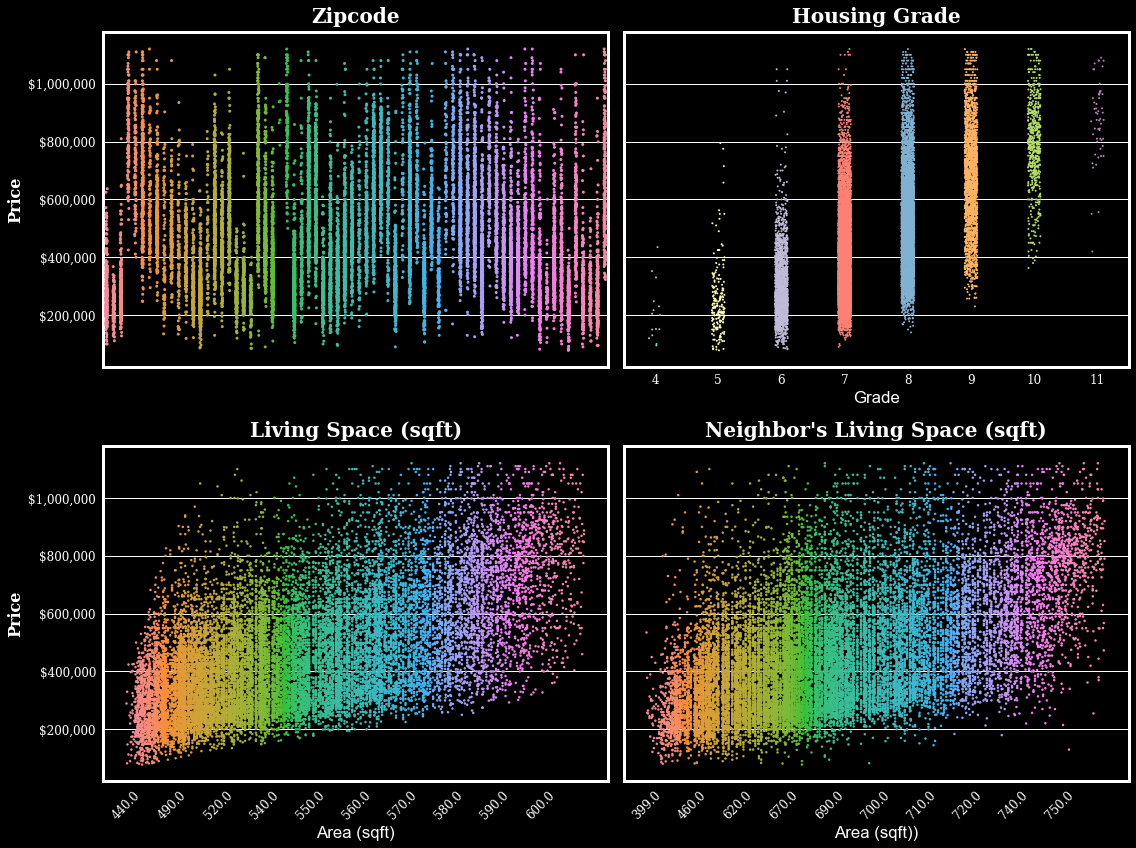

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.style.use('dark_background')

# figSum, ax = plt.subplots(nrows=2,ncols=2,figsize=(16,16),sharey=True)
fig, ax = plt.subplots(figsize=(16,12), ncols=2, nrows=2, sharey=True)


# Formatting dollar sign labels

fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

# Axis Label fonts
fontTitle = {'fontsize': 20,
           'fontweight': 'bold',
            'fontfamily':'serif'}

fontAxis = {'fontsize': 16,
           'fontweight': 'bold',
            'fontfamily':'serif'}

fontTicks = {'fontsize': 12,
           'fontweight':'medium',
            'fontfamily':'serif'}

# The amount of space above titles
y_title_margin = 1.01

# Major title
# plt.suptitle("Critical Factors for Predicting Sales Price", y = 1.0, fontdict=fontTitle, fontsize=22)

## Subplot 1
i=0
j=0
ax[i][j].set_title("Zipcode",y = y_title_margin,fontdict=fontTitle)#, y = y_title_margin)
sns.stripplot(df_run_ols['codezipcode'],df_run_ols['price'],ax=ax[i,j],marker='o',size=3)

# Remove xticks
ax[i][j].set_xticks([]), ax[i][j].set_xlabel('')

# Change y-tick labels
ax[i][j].set_ylabel('Price',fontdict=fontAxis)

yticklab = ax[i][j].get_yticklabels()
ax[i][j].set_yticklabels(yticklab,fontdict=fontTicks)
ax[i,j].get_yaxis().set_major_formatter(tick) 


## Subplot 2
i=0
j=1
ax[i][j].set_title("Housing Grade",y = y_title_margin,fontdict=fontTitle)
ax[i][j].title.set_fontsize(20)
sns.stripplot(df_run_ols['grade'],df_run_ols['price'],ax=ax[i,j],marker='o',size=2)

#Set x axis
xticklab=ax[i][j].get_xticklabels()
ax[i][j].set_xticklabels(xticklab,fontdict=fontTicks)

ax[i][j].set_xlabel('Grade')


# Change y-tick labels
ax[i][j].set_ylabel('')# 'Price',fontdict=fontAxis)

yticklab = ax[i][j].get_yticklabels()
ax[i][j].set_yticklabels(yticklab,fontdict=fontTicks)
ax[i,j].get_yaxis().set_major_formatter(tick) 


## Subplot 3
i=1
j=0
ax[i][j].set_title("Living Space (sqft)",y = y_title_margin,fontdict=fontTitle)
ax[i][j].title.set_fontsize(20)

sns.stripplot(df_run['sqft_living'],df_run_ols['price'],ax=ax[i,j],marker='.') #,marker='o',size=2)
# sns.stripplot(df_run_ols['sca_sqft_living'],df_run_ols['price'],ax=ax[i,j],marker='.') #,marker='o',size=2)

# Change the x-axis labels
ax[i,j].locator_params(axis='x',nbins=10)

xticklab=ax[i][j].get_xticklabels()
ax[i][j].set_xticklabels(xticklab,fontdict=fontTicks, rotation=45)

ax[i][j].set_xlabel('Area (sqft)')

# Change y-tick labels
ax[i][j].set_ylabel('Price',fontdict=fontAxis)

yticklab = ax[i][j].get_yticklabels()
ax[i][j].set_yticklabels(yticklab,fontdict=fontTicks)
ax[i,j].get_yaxis().set_major_formatter(tick) 


## Subplot 4
i=1
j=1
ax[i][j].set_title("Neighbor's Living Space (sqft)",y = y_title_margin,fontdict=fontTitle)
ax[i][j].title.set_fontsize(20)
# sns.stripplot(df_run_ols['sca_sqft_living15'],df_run_ols['price'],ax=ax[i,j],marker='.')#,size=2)
sns.stripplot(df_run['sqft_living15'],df_run_ols['price'],ax=ax[i,j],marker='.')#,size=2)


# Change the x-axis labels
ax[i,j].locator_params(axis='x',nbins=10)
ax[i][j].set_xlabel('Area (sqft))')
xticklab=ax[i][j].get_xticklabels()
ax[i][j].set_xticklabels(xticklab,fontdict=fontTicks, rotation=45)

# Change y-tick labels
ax[i][j].set_ylabel('')#Price',fontdict=fontAxis)

yticklab = ax[i][j].get_yticklabels()
ax[i][j].set_yticklabels(yticklab,fontdict=fontTicks)
ax[i,j].get_yaxis().set_major_formatter(tick) 


plt.tight_layout()
plt.savefig("summary_figure.png") # save as png

In [140]:
plt.savefig("summary_figure.png") # save as png

<Figure size 576x396 with 0 Axes>

In [135]:
df_run_ols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19053 entries, 0 to 21596
Data columns (total 5 columns):
price                19053 non-null float64
codezipcode          19053 non-null category
grade                19053 non-null int64
sca_sqft_living      19053 non-null float64
sca_sqft_living15    19053 non-null float64
dtypes: category(1), float64(3), int64(1)
memory usage: 1.4 MB


---
# END OF PROJECT 1 RE-SUBMISSION
---

# ORIGINAL REGRESSION FROM FIRST PROJECT REVIEW SUBMISSION

In [136]:
# DEFINING FUNCTION TO RUN K-FOLD VALIDATION
def k_fold_val(X,y,k=10,QQ=False):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics 

    # Run 10-fold cross validation
    i=0
    results = [['set#','R_square_train','MSE_train','R_square_test','MSE_test']]
    
    num_coeff = X.shape[1]
    
    list_predictors = [str(x) for x in X.columns]
    list_predictors.append('intercept') 
    
    reg_params = [list_predictors]
    
    
    while i <(k+1):
        X_train, X_test, y_train, y_test = train_test_split(X,y) #,stratify=[cat_col_names])


        linreg = LinearRegression()
        linreg.fit(X_train, y_train)


        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)

        train_residuals = y_hat_train - y_train
        test_residuals = y_hat_test - y_test
        
#         if QQ ==True:
# #             fig = sm.graphics.qqplot(train_residuals, dist=stats.norm, line='45', fit=True) 
# #             fig=figure(figsize=(12,12)
# #             plt.figure()
#             fig, ax = sm.graphics.qqplot(test_residuals, dist=stats.norm, line='45', fit=True)
#             ax.set_title('Test Residuals')
#             plt.show()
        
        train_mse = metrics.mean_squared_error(y_train, y_hat_train)
        test_mse = metrics.mean_squared_error(y_test, y_hat_test)

        R_sqare_train = metrics.r2_score(y_train,y_hat_train)
        R_square_test = metrics.r2_score(y_test,y_hat_test)

        results.append([i,R_sqare_train,train_mse,R_square_test,test_mse])
        params_to_add = [x for x in linreg.coef_]
        params_to_add.append(linreg.intercept_)
        reg_params.append(params_to_add)

        i +=1
    

    df_res=pd.DataFrame(results)
    df_res.columns=df_res.iloc[0,:]
    df_res = df_res[1:]
    
    df_params = pd.DataFrame(reg_params)
    df_params.columns=df_params.iloc[0,:]
    df_params = df_params[1:]

    r2_test = np.array(df_res.iloc[1:,3]).mean()
    MSE_test = np.array(df_res.iloc[1:,4]).mean()
    
    print(f'For k={k}: mean r2 = {round(r2_test,3)}, mean MSE = {round(MSE_test,3)}')

    return df_res, df_params

In [137]:
# Output 1:
df_res,df_params = k_fold_val(X,y,QQ=True)
df_res

For k=10: mean r2 = 0.447, mean MSE = 21985739910.335


,set#,R_square_train,MSE_train,R_square_test,MSE_test
1,0,0.453613,2.1983e+10,0.441052,2.1941e+10
2,1,0.452829,2.20196e+10,0.443334,2.18351e+10
3,2,0.44418,2.22504e+10,0.469745,2.11353e+10
4,3,0.449335,2.19672e+10,0.454104,2.19824e+10
5,4,0.448016,2.22446e+10,0.458277,2.11528e+10
6,5,0.45124,2.20388e+10,0.448494,2.17685e+10
7,6,0.453468,2.18503e+10,0.441867,2.23331e+10
8,7,0.452633,2.19188e+10,0.444268,2.21294e+10
9,8,0.456937,2.15319e+10,0.431653,2.32946e+10
10,9,0.453385,2.18478e+10,0.44105,2.23636e+10


In [138]:
df_params

,codezipcode,grade,sca_sqft_living,sca_sqft_living15,intercept
1,1697.67,72047.9,77544.8,40303.5,-144600
2,1630.43,72254.9,79817.4,37118.1,-143767
3,1649.3,70677,80192.9,37468,-132677
4,1691.09,70794.7,77855.1,40610.2,-135203
5,1693.32,70127.6,79742,38497.7,-129984
6,1653.37,69565.2,80001.3,39460.6,-125224
7,1636.41,70902.6,78493.6,39532.4,-134339
8,1655.1,71590.6,79085.1,38110.8,-140461
9,1667.89,69714,79849.2,39756.7,-128011
10,1718.2,72319.2,79287.1,37231.1,-149422


**Output 1:**
- Predictors :
    - logZ_sqft_living','logZ_sqft_living15','bedrooms','bathrooms','floors', cat_grade, cat_view, cat_bins_sqftabove, cat_bins_sqftbasement]
- For k=10: mean r2 = 0.595, mean MSE = 0.407
- X_cats = df_run[['logZ_sqft_living','logZ_sqft_living15','bedrooms','bathrooms','floors', 'cat_grade', 'cat_view',\
                'cat_bins_sqftabove', 'cat_bins_sqftbasement']]
- Realized did not have zipcodes included, adding to model and trying again. 

In [139]:
# MODEL #2
# PUTTING TOGETHER THE PREDICTORS TO RUN IN THE REGRESSION
## Last min dummy vars []'cat_grade','cat_zipcode','cat_view','cat_bins_sqft_above','cat_bins_sqft_basement']
dum_grades = pd.get_dummies(df_run['cat_grade'],prefix='gr').iloc[:,:-1]
dum_view = pd.get_dummies(df_run['cat_view'], prefix='view').iloc[:,:-1]
dum_sqft_above = pd.get_dummies(df_run['cat_bins_sqftabove'],prefix='sqftAb').iloc[:,:-1]
dum_sqft_base = pd.get_dummies(df_run['cat_bins_sqftbasement'],prefix='sqftBa').iloc[:,:-1]
dum_zipcodes = pd.get_dummies(df_run['cat_zipcode'],prefix='zip').iloc[:,:-1]

# RUNNING K-FOLD VALIDATION.
# X = df_run.drop(['price','logZ_price'],axis=1)
list_predictors = ['logZ_sqft_living','logZ_sqft_living15','bedrooms','bathrooms','floors']
X = df_run[list_predictors]
X = pd.concat([X,dum_grades,dum_view,dum_sqft_above,dum_sqft_base,dum_zipcodes],axis=1) #dum_bedrooms
y = df_run['logZ_price']

# Output 2:
df_res,df_params = k_fold_val(X,y)
df_res

KeyError: 'cat_grade'

In [ ]:
df_params

**Output 2:**
- Predictors :
    - df_run[['logZ_sqft_living','logZ_sqft_living15','bedrooms','bathrooms','floors', 'cat_grade', 'cat_view',\
                'cat_bins_sqftabove', 'cat_bins_sqftbasement','cat_zipcode']]
    
- For k=10: mean r2 = -5.98119975258282e+20, mean MSE = 5.910069200674956e+20
- Clearly adding zipcodes in was a mistake. I wasn't aware you could get a negative R-square value

- For next iteration, will remove zipcodes, and will remove logZ_sqft_living since had correlation with sqftabove

In [ ]:
# MODEL #3
# PUTTING TOGETHER THE PREDICTORS TO RUN IN THE REGRESSION
## Last min dummy vars []'cat_grade','cat_zipcode','cat_view','cat_bins_sqft_above','cat_bins_sqft_basement']
dum_grades = pd.get_dummies(df_run['cat_grade'],prefix='gr').iloc[:,:-1]
dum_view = pd.get_dummies(df_run['cat_view'], prefix='view').iloc[:,:-1]
dum_sqft_above = pd.get_dummies(df_run['cat_bins_sqftabove'],prefix='sqftAb').iloc[:,:-1]
dum_sqft_base = pd.get_dummies(df_run['cat_bins_sqftbasement'],prefix='sqftBa').iloc[:,:-1]
# dum_zipcodes = pd.get_dummies(df_run['cat_zipcode'],prefix='zip').iloc[:,:-1]

# RUNNING K-FOLD VALIDATION.
# X = df_run.drop(['price','logZ_price'],axis=1)
list_predictors = ['logZ_sqft_living15','bedrooms','bathrooms','floors']
X = df_run[list_predictors]
X = pd.concat([X,dum_grades,dum_view,dum_sqft_above,dum_sqft_base],axis=1) #dum_bedrooms
y = df_run['logZ_price']

# Output 3:
df_res,df_params = k_fold_val(X,y)
df_res

In [ ]:
df_params

**Output 3:**
- For k=10: mean r2 = 0.585, mean MSE = 0.408
- Slightly worse than original model. 
- Adding back sqft_living, removing floors


In [ ]:
# MODEL #4
# PUTTING TOGETHER THE PREDICTORS TO RUN IN THE REGRESSION
## Last min dummy vars []'cat_grade','cat_zipcode','cat_view','cat_bins_sqft_above','cat_bins_sqft_basement']
dum_grades = pd.get_dummies(df_run['cat_grade'],prefix='gr').iloc[:,:-1]
dum_view = pd.get_dummies(df_run['cat_view'], prefix='view').iloc[:,:-1]
dum_sqft_above = pd.get_dummies(df_run['cat_bins_sqftabove'],prefix='sqftAb').iloc[:,:-1]
dum_sqft_base = pd.get_dummies(df_run['cat_bins_sqftbasement'],prefix='sqftBa').iloc[:,:-1]
# dum_zipcodes = pd.get_dummies(df_run['cat_zipcode'],prefix='zip').iloc[:,:-1]

# RUNNING K-FOLD VALIDATION.
# X = df_run.drop(['price','logZ_price'],axis=1)
list_predictors = ['logZ_sqft_living','logZ_sqft_living15','bedrooms','bathrooms']
X = df_run[list_predictors]
X = pd.concat([X,dum_grades,dum_view,dum_sqft_above,dum_sqft_base],axis=1) #dum_bedrooms
y = df_run['logZ_price']

# Output 4:
df_res,df_params = k_fold_val(X,y)
df_res

In [ ]:
df_params

**Output 4:**
- For k=10: mean r2 = 0.589, mean MSE = 0.411
- slightly worse than original model 
- add back floors
- add waterfront

In [ ]:
# Model 5: 
# PUTTING TOGETHER THE PREDICTORS TO RUN IN THE REGRESSION
## Last min dummy vars []'cat_grade','cat_zipcode','cat_view','cat_bins_sqft_above','cat_bins_sqft_basement']
dum_grades = pd.get_dummies(df_run['cat_grade'],prefix='gr').iloc[:,:-1]
dum_view = pd.get_dummies(df_run['cat_view'], prefix='view').iloc[:,:-1]
dum_sqft_above = pd.get_dummies(df_run['cat_bins_sqftabove'],prefix='sqftAb').iloc[:,:-1]
dum_sqft_base = pd.get_dummies(df_run['cat_bins_sqftbasement'],prefix='sqftBa').iloc[:,:-1]
dum_waterfront = pd.get_dummies(df_run['cat_waterfront'],prefix='wat').iloc[:,:-1]



# RUNNING K-FOLD VALIDATION WITH STATSMODELS OLS.
# X = df_run.drop(['price','logZ_price'],axis=1)
list_predictors = ['logZ_sqft_living','logZ_sqft_living15','bedrooms','bathrooms','floors']
X = df_run[list_predictors]
X = pd.concat([X,dum_grades,dum_view,dum_sqft_above,dum_sqft_base,dum_waterfront],axis=1) #dum_bedrooms
y = df_run['logZ_price']

# Output 5:
df_res,df_params = k_fold_val(X,y)
df_res

In [ ]:
df_params

In [ ]:
df_params

**Output 5:**
- For k=10: mean r2 = 0.596, mean MSE = 0.405
- Ever so slightly better than initial model.
    - Do not have additional time to try other models. 


## Regression Diagnostics

In [ ]:
## REGRESSION FUNCTION
# DEFINING FUNCTION TO RUN K-FOLD VALIDATION
def k_fold_val(X,y,k=10):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn import metrics 

    # Run 10-fold cross validation
    i=0
    results = [['set#','R_square_train','MSE_train','R_square_test','MSE_test']]
    residuals= [['y_train','y_test','train_residuals','test_residuals' ]]
   
    num_coeff = X.shape[1]
    
    list_predictors = [str(x) for x in X.columns]
    # reg_params = ['intercept']
    # reg_params.append(list_predictors)
    list_predictors.append('intercept') 
    reg_params = [list_predictors]
    while i <(k+1):
        X_train, X_test, y_train, y_test = train_test_split(X,y) #,stratify=[cat_col_names])


        linreg = LinearRegression()
        linreg.fit(X_train, y_train)


        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)

        train_residuals = y_hat_train - y_train
        test_residuals = y_hat_test - y_test
        

        
        
        train_mse = metrics.mean_squared_error(y_train, y_hat_train)
        test_mse = metrics.mean_squared_error(y_test, y_hat_test)

        R_sqare_train = metrics.r2_score(y_train,y_hat_train)
        R_square_test = metrics.r2_score(y_test,y_hat_test)

        results.append([i,R_sqare_train,train_mse,R_square_test,test_mse])
        params_to_add = [x for x in linreg.coef_]
        params_to_add.append(linreg.intercept_)
        reg_params.append(params_to_add)
        
        i +=1
    if 
        fig, ax = plt.subplot(121)
        fig = sm.graphics.qqplot(train_residuals, dist=stats.norm, line='45', fit=True)
        fig = sm.graphics.qqplot(test_residuals, dist=stats.norm, line='45', fit=True)
    df_res=pd.DataFrame(results)
    df_reg_params = pd.DataFrame(reg_params)

    r2_test = np.array(df_res.iloc[1:,3]).mean()
    MSE_test = np.array(df_res.iloc[1:,4]).mean()
    
    print(f'For k={k}: mean r2 = {round(r2_test,3)}, mean MSE = {round(MSE_test,3)}')

    return df_res, df_reg_params

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
plt.style.use('fivethirtyeight')

data = pd.read_csv('Advertising.csv', index_col=0)
# f = 'sales~TV'
# f2 = 'sales~radio'
# model = smf.ols(formula=f, data=data).fit()
# model2 = smf.ols(formula=f2, data=data).fit()
#
resid1 = 
resid2 =
resid1 = model.resid
resid2 = model2.resid
fig = sm.graphics.qqplot(resid1, dist=stats.norm, line='45', fit=True,   )
fig = sm.graphics.qqplot(resid2, dist=stats.norm, line='45', fit=True)
fig.show()

## Final Model  (original)
- For k=10 fold validation, with logZ_price as target variable:
    - mean r2 = 0.596, mean MSE = 0.405
- Predictors in final model:
    - 'logZ_sqft_living'
    - 'logZ_sqft_living15'
    - 'bedrooms'
    - 'bathrooms'
    - 'floors'
    - grade
    - view
    - sqft_above
    - sqft_basement
    - waterfront

- My final model indicates that several aspects of the size of the house are important for determining price: (sqft) of the living areas, as well as the presence/size of basements, in addition to the # of floors, bedrooms, and bathrooms. Additionally, more qualitative aspects of the neighborhood/area also play and important role, such as if the house is waterfront property, the aesthetic quality of the view, as well as housing-grade 

## Predictor Coefficients & Their Affect On Sales Price
- I admittedly do not know how to interpret the coefficients for dummy-coded variables, part of why I tried desperately to avoid them but couldn't resolve the sparse class issue when attempting to use test-train-split.
    - They are all the same variable, and yet have wildly different coefficients.
- However, I would say that housing grade seems to have a strong + relationship with sales price, the higher the grade the higher the sales price
- The square footage of the living area is also + correlated with sales price. 
- The squarefootage of the basement also has a strong + relationship with salesprice.